<a href="https://colab.research.google.com/github/satrianugrahasatt/B5026221119/blob/main/PBA_MiFit_rev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Scrapping Google Apps Review - MiFit**
Week 2 NLP Pipeline PBA - Genap 2025

# Installing Dependencies and Importing Library

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install google_play_scraper
!pip install textblob
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.3 MB/s eta 0:00:00


In [4]:
from google_play_scraper import app
import pandas as pd
import numpy as np
import sklearn
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
import textblob
#from wordcloud import WordCloud
from pathlib import Path
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

import pickle
import re
import time
import datetime                              # access to %%time, for timing individual notebook cells
import os
from PIL import Image
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

%matplotlib inline
%config InlineBackend.figure_format='retina'

# Import seaborn styles explicitly
import seaborn as sns
# Apply the seaborn style before creating plots
sns.set_style("whitegrid")  # This line sets the Seaborn style

plt.rcParams["figure.figsize"] = (15,10)

# Scraping MiFit Reviews

In [5]:
from google_play_scraper import app, Sort, reviews_all

mifit_reviews = reviews_all(
    'com.xiaomi.wearable',
    sleep_milliseconds=0, # defaults to 0
    lang='en', # defaults to 'en'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
)

In [6]:
#Menyimpan Reviews pada DataFrame
df_mifit = pd.DataFrame(np.array(mifit_reviews),columns=['content'])
df_mifit = df_mifit.join(pd.DataFrame(df_mifit.pop('content').tolist()))

In [7]:
df_mifit

reviewId       userName  \
0      b52cce1c-6364-42a3-a6e5-75e1f24648a1  A Google user   
1      d42c3240-8c55-46c0-a0c8-a05f8b14bcb4  A Google user   
2      5d714024-90b3-41d3-9bc5-fd91d43434ef  A Google user   
3      4b00c612-34ef-4c3d-b669-3e177e1a8837  A Google user   
4      8055e3e9-d77e-4ee8-b782-1f4515a2995b  A Google user   
...                                     ...            ...   
43910  7d4cfb51-9299-4c72-81ab-f4eba329b87a  A Google user   
43911  1fa8d82e-af85-4d8c-92b0-f687674dfac0  A Google user   
43912  fbb2c8e2-b603-4129-ac71-a97a92afe3d3  A Google user   
43913  efc85b44-b989-44cc-9bda-879230a55a36  A Google user   
43914  419b2c65-cd92-4635-bf84-d70bf0d29dde  A Google user   

                                               userImage  \
0      https://play-lh.googleusercontent.com/EGemoI2N...   
1      https://play-lh.googleusercontent.com/EGemoI2N...   
2      https://play-lh.googleusercontent.com/EGemoI2N...   
3      https://play-lh.googleusercontent.com/EGemoI2N...   
4      https://play-lh.googleusercontent.com/EGemoI2N...   
...                                                  ...   
43910  https://play-lh.googleusercontent.com/EGemoI2N...   
43911  https://play-lh.googleusercontent.com/EGemoI2N...   
43912  https://play-lh.googleusercontent.com/EGemoI2N...   
43913  https://play-lh.googleusercontent.com/EGemoI2N...   
43914  https://play-lh.googleusercontent.com/EGemoI2N...   

                                                 content  score  \
0                                                   good      5   
1      Just bought the xiaomi watch s4 to find it's n...      1   
2                        Add Padel and Wing Chun workout      2   
3      I am a new user from AmazFit GTS 4 Mini. Unfor...      3   
4                                                perfect      4   
...                                                  ...    ...   
43910  It's not possible to conect the Redmi Band!!! ...      1   
43911  How to change time format, I can't find, 12/24...      3   
43912  The clock is still 24hrs format even if I set ...      3   
43913  This app is ridiculous, when I press the add d...      1   
43914  I am using MI Watch Color but this app not sho...      1   

       thumbsUpCount reviewCreatedVersion                  at replyContent  \
0                  0              3.37.2i 2025-04-01 23:08:35         None   
1                  0              3.37.2i 2025-04-01 21:09:48         None   
2                  0              3.37.2i 2025-04-01 20:52:01         None   
3                  0              3.37.2i 2025-04-01 18:12:49         None   
4                  0              3.37.2i 2025-04-01 16:59:23         None   
...              ...                  ...                 ...          ...   
43910              3                 None 2020-06-30 20:08:26         None   
43911              4         1.1.16i-play 2020-06-30 09:38:49         None   
43912             16         1.1.16i-play 2020-06-22 03:50:39         None   
43913              9         1.1.16i-play 2020-06-21 10:05:56         None   
43914              4                 None 2020-06-03 03:59:38         None   

      repliedAt    appVersion  
0           NaT       3.37.2i  
1           NaT       3.37.2i  
2           NaT       3.37.2i  
3           NaT       3.37.2i  
4           NaT       3.37.2i  
...         ...           ...  
43910       NaT          None  
43911       NaT  1.1.16i-play  
43912       NaT  1.1.16i-play  
43913       NaT  1.1.16i-play  
43914       NaT          None  

[43915 rows x 11 columns]

In [8]:
df_mifit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43915 entries, 0 to 43914
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              43915 non-null  object        
 1   userName              43915 non-null  object        
 2   userImage             43915 non-null  object        
 3   content               43915 non-null  object        
 4   score                 43915 non-null  int64         
 5   thumbsUpCount         43915 non-null  int64         
 6   reviewCreatedVersion  39048 non-null  object        
 7   at                    43915 non-null  datetime64[ns]
 8   replyContent          21 non-null     object        
 9   repliedAt             21 non-null     datetime64[ns]
 10  appVersion            39048 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 3.7+ MB


# Cleaning Dataframe

In [9]:
# Adding the increment id variables
df_mifit['id'] = range(1, len(df_mifit) + 1)

In [10]:
# Delete the unnecessary columns
df_mifit = df_mifit.drop(columns =["reviewId", "userName", "userImage", "replyContent", "repliedAt"])

In [11]:
df_mifit.to_csv('/content/drive/My Drive/PBA/MiFit_Reviews.csv', index=False)

In [12]:
#Check number of reviews scores
df_mifit['score'].value_counts()

score
5    20344
1    11024
4     5632
3     3743
2     3172
Name: count, dtype: int64

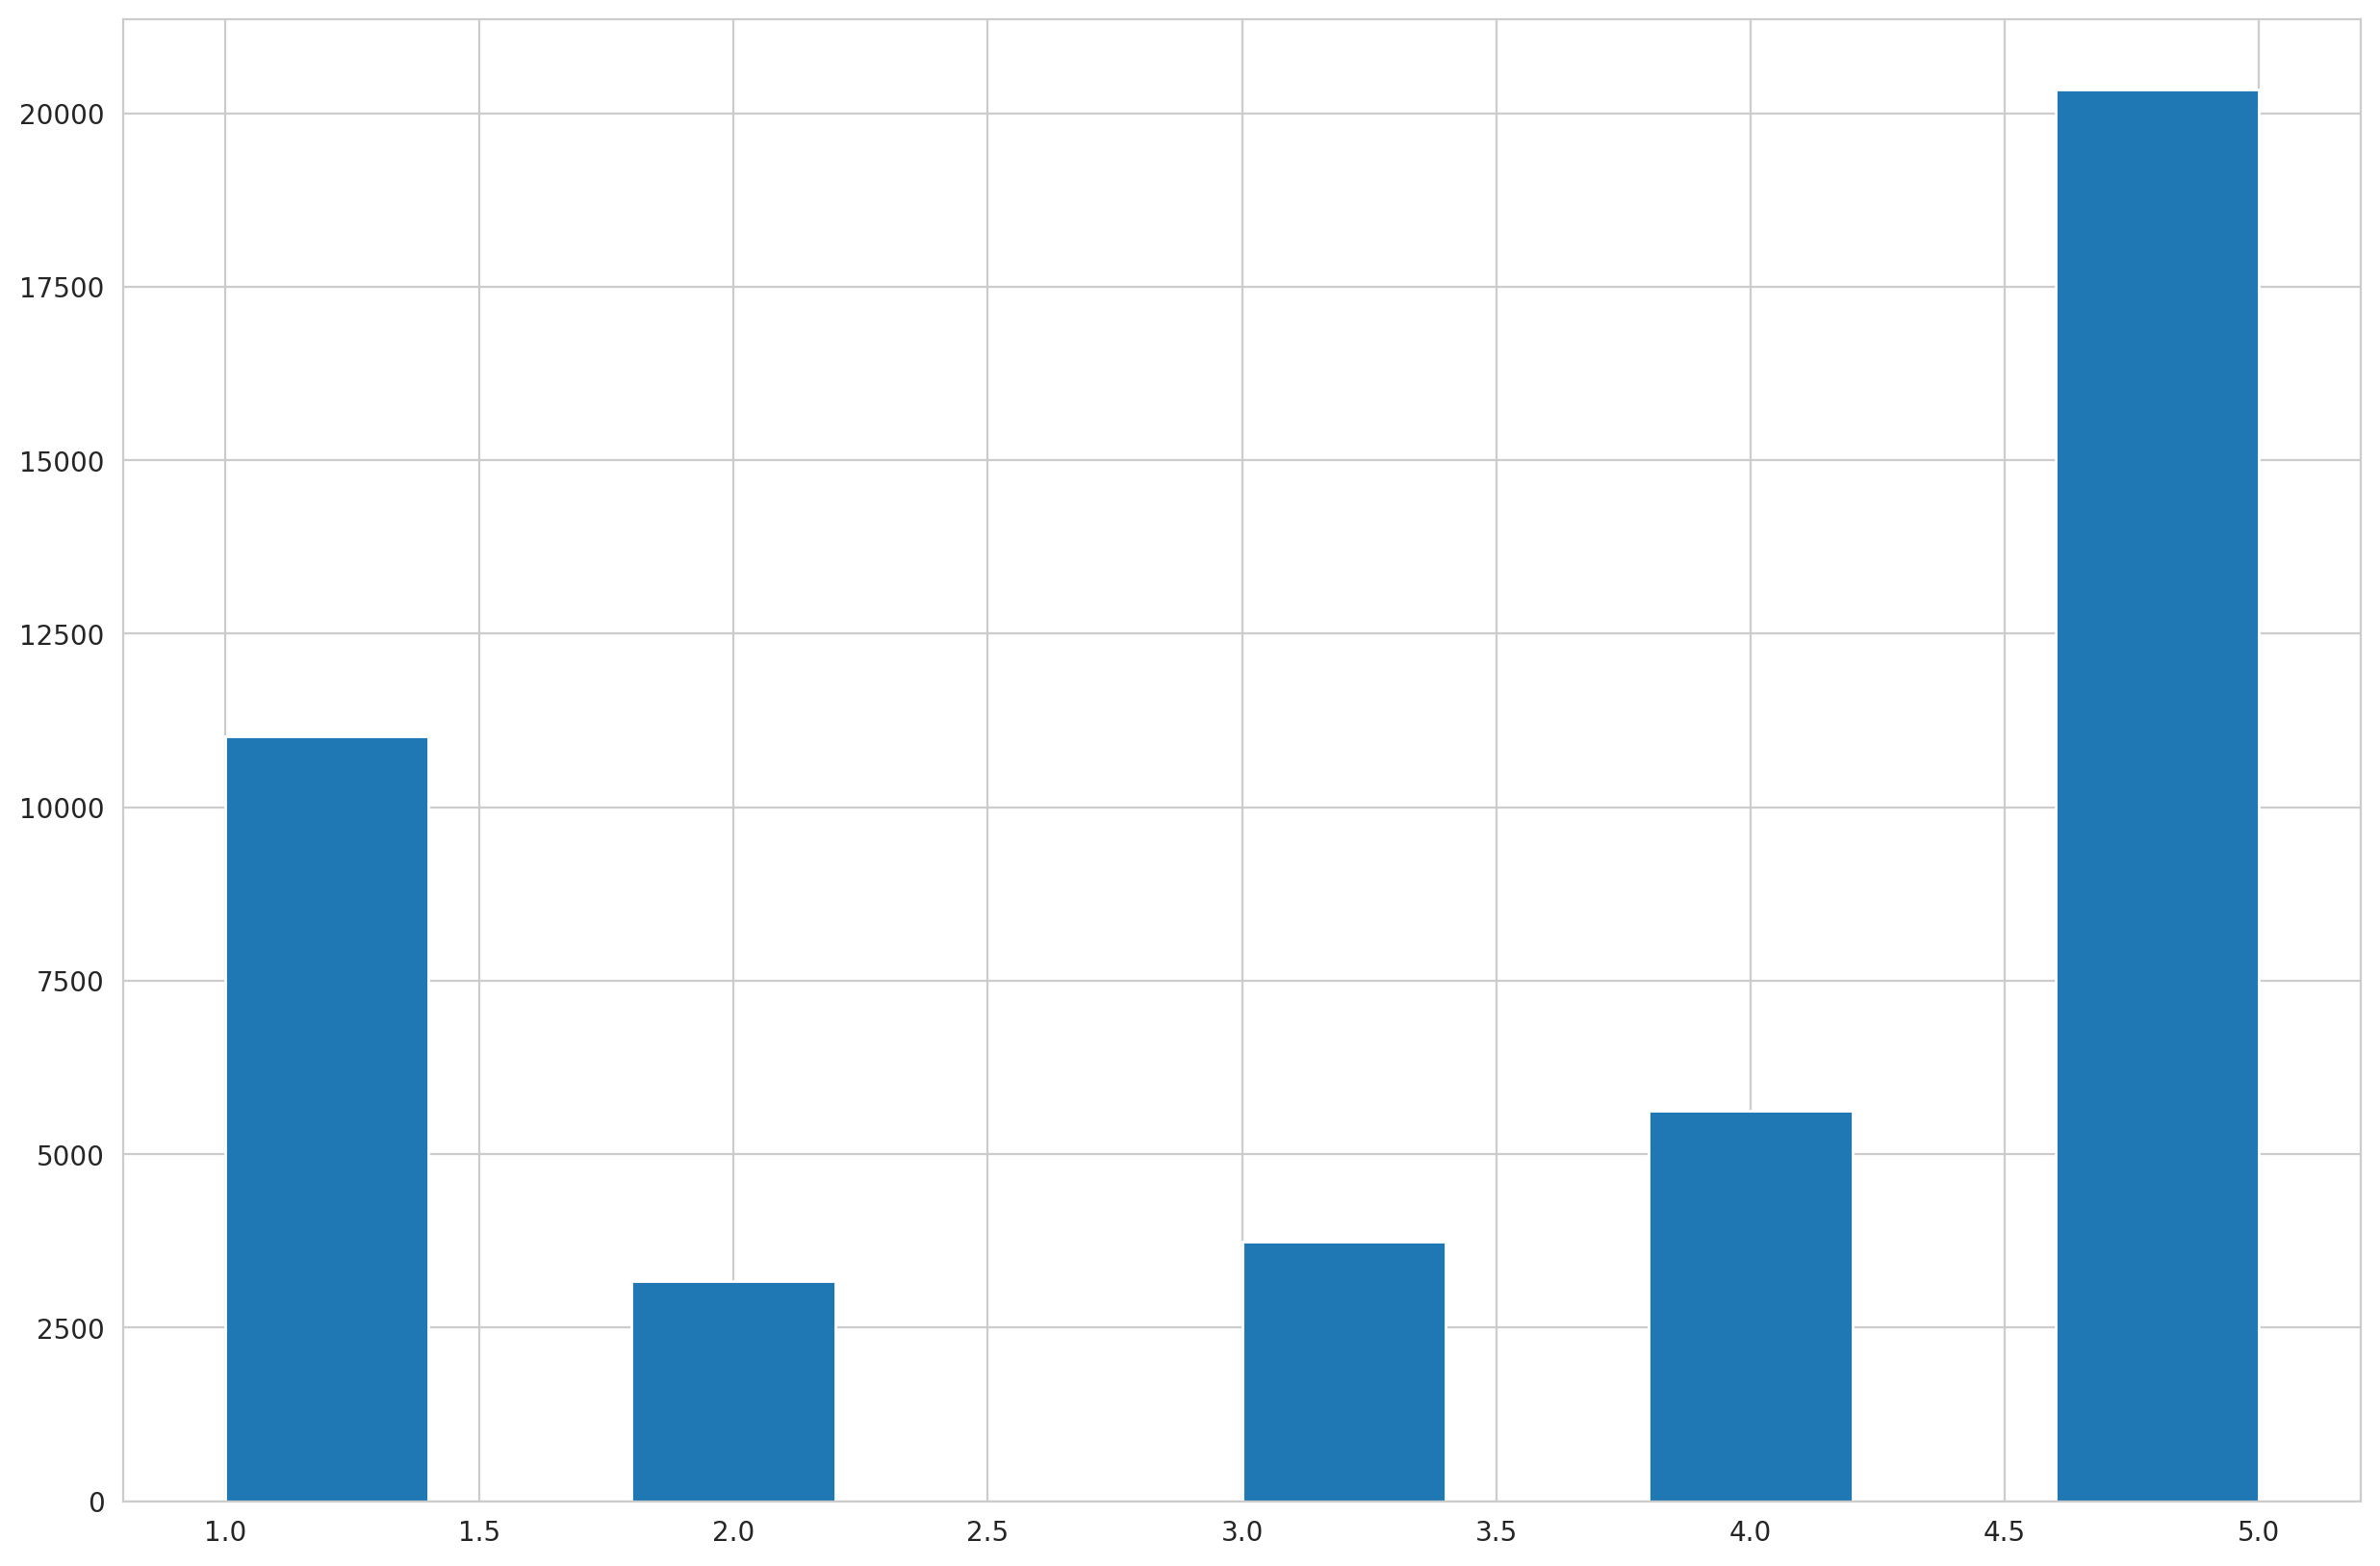

In [13]:
plt.hist(df_mifit['score'])
plt.show()

## Remove non-English Reviews

In [14]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=d80559d674c9da4e8014b71512337cae51c6f2c33d6965f4a996b34826d36d7c
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


In [15]:
from langdetect import detect, LangDetectException # Import LangDetectException

def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return 'unknown'  # Or any other value to indicate an error

df_mifit = df_mifit[df_mifit['content'].apply(detect_language) == 'en']

In [16]:
# tampilkan jumlah bahasa yang terdetect dan berapa row yang termasuk bahasa tersebut

from collections import Counter

def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return 'unknown'

# Assuming df_mifit is already defined as in your provided code
# If not, load your dataframe here:
# df_mifit = pd.read_csv('/content/drive/My Drive/PBA/Review.csv')

# Detect languages for each review
df_mifit['language'] = df_mifit['content'].apply(detect_language)

# Count language occurrences and create a new dataframe
language_counts = Counter(df_mifit['language'])
language_df = pd.DataFrame.from_dict(language_counts, orient='index', columns=['count'])
language_df.index.name = 'language'
language_df = language_df.sort_values(by=['count'], ascending=False).reset_index()

language_df


language  count
0        en  29530
1        af     62
2        sl     30
3        cy     29
4        ro     23
5        it     21
6        fr     21
7        no     16
8        tl     15
9        de     13
10       da      9
11       id      8
12       ca      8
13       nl      8
14       sv      7
15       so      7
16       es      6
17       et      4
18       pl      4
19       sw      3
20       sq      2
21       pt      1
22       fi      1
23       sk      1
24       tr      1
25       lv      1
26       vi      1

In [17]:
df_mifit = df_mifit[df_mifit['language'] == 'en']


In [18]:
df_mifit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29530 entries, 1 to 43914
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   content               29530 non-null  object        
 1   score                 29530 non-null  int64         
 2   thumbsUpCount         29530 non-null  int64         
 3   reviewCreatedVersion  26321 non-null  object        
 4   at                    29530 non-null  datetime64[ns]
 5   appVersion            26321 non-null  object        
 6   id                    29530 non-null  int64         
 7   language              29530 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 2.0+ MB


In [19]:
df_mifit = df_mifit.drop(columns =["language"])

# Sentiment Analysis Before Preprocessing

# Text Pre-Processing

In [20]:
!pip install emoji

import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth", 200)
#from pandas_profiling import ProfileReport
import regex
import nltk
import wordcloud
import textblob

from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

import string
import re
import emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 8.0 MB/s eta 0:00:00


In [21]:
#Creating polarity on the column: content (review from the apps) using TextBlob
#Read https://textblob.readthedocs.io/en/dev/quickstart.html

from textblob import TextBlob
df_mifit['sentiment_polarity'] = df_mifit['content'].apply(lambda x: TextBlob(x).polarity)
df_mifit['sentiment_subjective'] = df_mifit['content'].apply(lambda x: TextBlob(x).subjectivity)

In [22]:
df_mifit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29530 entries, 1 to 43914
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   content               29530 non-null  object        
 1   score                 29530 non-null  int64         
 2   thumbsUpCount         29530 non-null  int64         
 3   reviewCreatedVersion  26321 non-null  object        
 4   at                    29530 non-null  datetime64[ns]
 5   appVersion            26321 non-null  object        
 6   id                    29530 non-null  int64         
 7   sentiment_polarity    29530 non-null  float64       
 8   sentiment_subjective  29530 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 2.3+ MB


In [23]:
#Add a column name polarity_rating from changing the score of the review into 3 labels: Pos, Negative Neutral
df_mifit['sentiment_rating'] = df_mifit['score'].apply(lambda x: 'Positive' if x > 3 else('Neutral' if x == 3  else 'Negative'))

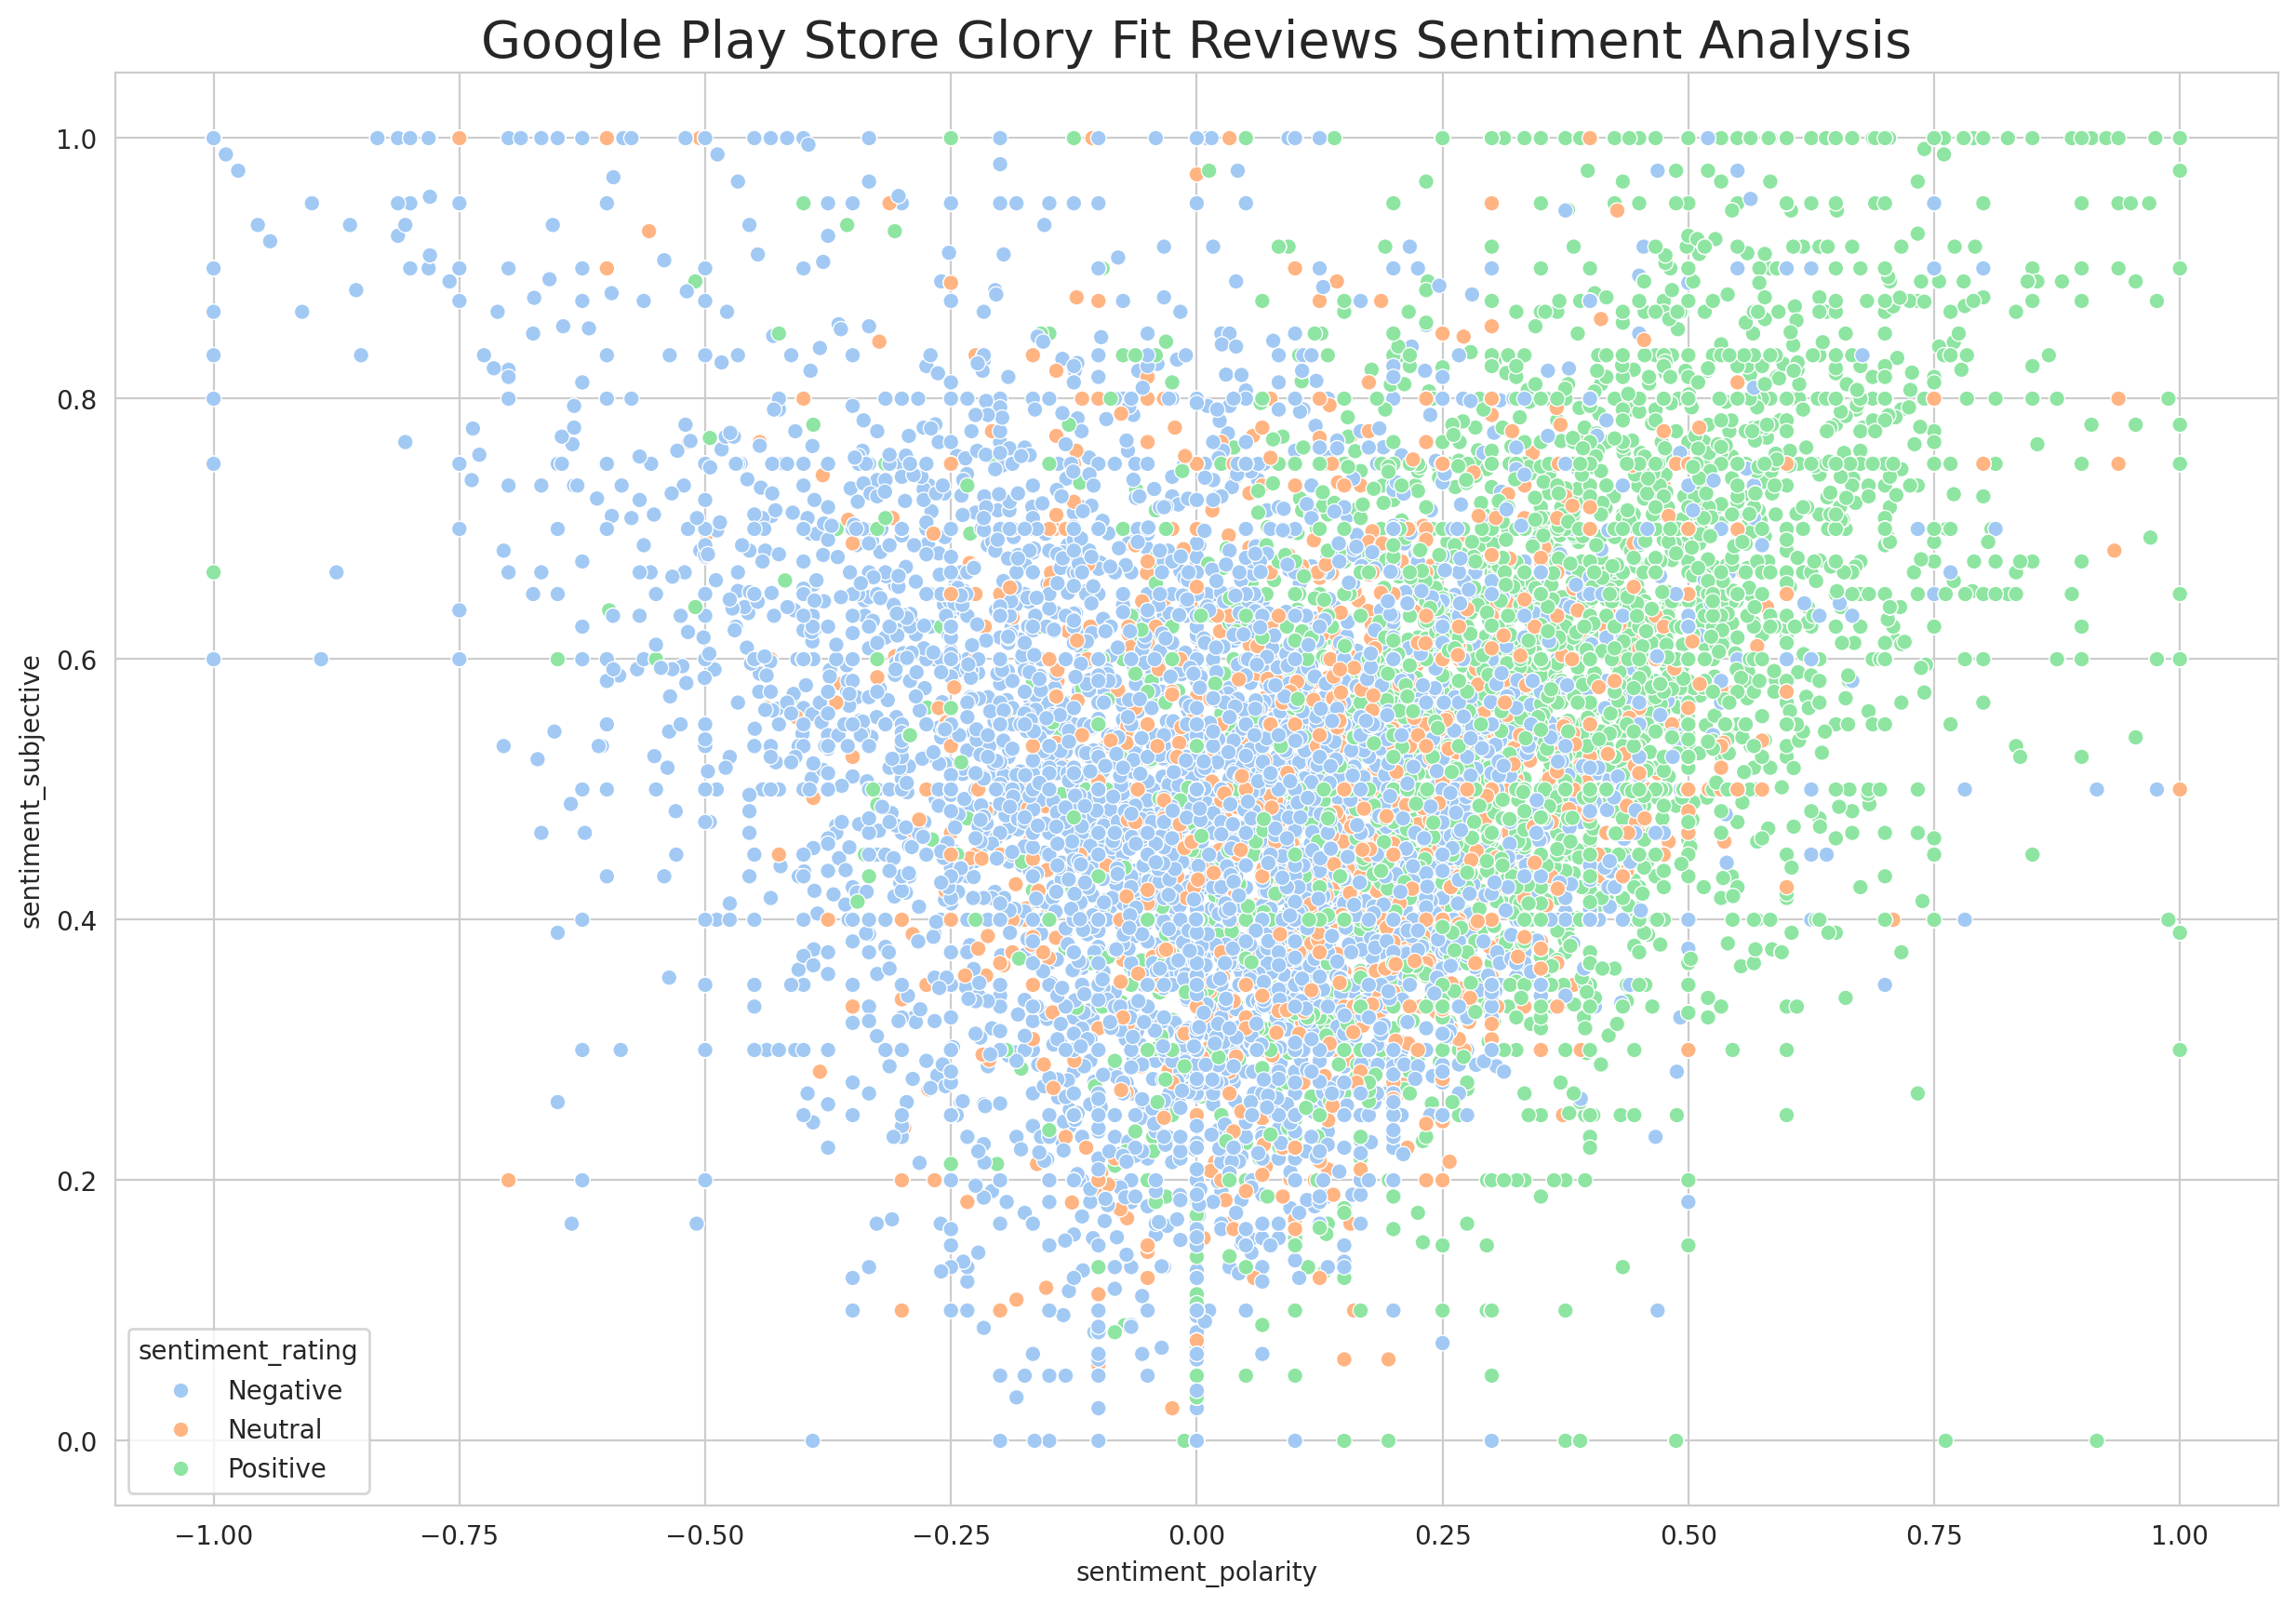

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
# Specify x and y using the 'x' and 'y' parameters within sns.scatterplot
sns.scatterplot(x=df_mifit['sentiment_polarity'], y=df_mifit['sentiment_subjective'],
                hue=df_mifit['sentiment_rating'], edgecolor='white', palette="pastel")
plt.title("Google Play Store Glory Fit Reviews Sentiment Analysis", fontsize=20)
plt.show()

## Lowercasing

In [25]:
#DATA PREPROCESSING
# Lower casing
# Change the reviews type to string
df_mifit['content'] = df_mifit['content'].astype(str)# Before lowercasing
# Before lowercasing
print(df_mifit['content'][188])
print(df_mifit['content'][10])
print(df_mifit['content'][1934])

Useful and health beneficial
This is very useless app compert to the previous that the bands used. Zepp life is waaaay better i have been buying every mi band that comes out but they are getting very bad the last good one was Mi band 5
Good tracking


In [26]:
#Lowercase all reviews to see the difference
df_mifit['content']= df_mifit['content'].apply(lambda x: x.lower())
print(df_mifit['content'][188])
print(df_mifit['content'][10])
print(df_mifit['content'][1934])

useful and health beneficial
this is very useless app compert to the previous that the bands used. zepp life is waaaay better i have been buying every mi band that comes out but they are getting very bad the last good one was mi band 5
good tracking


## Removing Emoji and Special Character

In [27]:
#check if there is any special character
alphabet = string.ascii_letters+string.punctuation
print(df_mifit.content.str.strip(alphabet).astype(bool).any())

extracted_emojis=[]

def extract_emojis(s):
    expe = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
    return expe.findall(s)
    return expe.sub(r'',s)

for y in df_mifit['content']:
    #print(str(extract_emojis(y)))
    extracted_emojis.append(str(extract_emojis(y)))

print(extracted_emojis)

True
['[]', '[]', '[]', '[]', '[]', "['💕', '😄']", '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', "['😉']", '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', "['😡', '🤬']", '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', "['😭']", '[]', '[]', '[]', '[]', "['😔']", '[]', '[]', '[]', '[]', "['😢']", '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', "['🤣', '🤣']", '[]', '[]', '[]', '[]', '[]', '[]', '[]', "['🙂']", '[]', "['💯']", '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', "['🙏', '🏼']", "['👌']", "['👌']", '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', "['👍']", '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', "['👌', '🏻', '👌', '🏻', '👌', '🏻', '👍', '🏻', '👍', '🏻', '👍', '🏻']", '[]', '[]', "['😄', '😄', '👍']", '[]', 

In [28]:
import re
import string

def cleaning_text(text):
  # Menambah spasi setelah koma pada koma yang tidak diberi spasi
  text = re.sub(r",(?!\s)", ", ", text)
  # Menghapus tab, new line, back slice, dll
  text = text.replace('\\t', " ").replace('\\n', " ").replace('\\u', " ").replace('\\', "")
  # Menghapus karakter non ASCII (emoticon, chinese word, dll),
  text = text.encode('ascii', 'replace').decode('ascii')
  # Menghapus URL
  text = re.sub(r"(?i)(?:https?:\/\/)?(?:www\.)?(?:[a-zA-Z0-9-.]+)(?:\.[a-zA-Z]{2,6})(?:\/[^\s\r\n]*)?", "", text)
  # Menghapus whitespace di depan/belakang teks dan double++ spasi
  text = text.strip()
  text = re.sub('\s+', ' ', text)
  # Menghapus tanda baca
  text = text.translate(str.maketrans("", "", string.punctuation))

  return text

In [29]:
df_mifit['content'] = df_mifit['content'].apply(cleaning_text)

In [30]:
df_mifit.head()

content  \
1                                            just bought the xiaomi watch s4 to find its not supported by mi fitness yet please let me know when the watch will be looking forward to using these together   
2                                                                                                                                                                          add padel and wing chun workout   
3  i am a new user from amazfit gts 4 mini unfortunately something is missing when i upload my activity to strava the name of the device doesnt show under the activity on strava its disappointing to ...   
5                                                                                                                                      not gonna lie without this app its gonna be the same with the watch   
7                                                                                         for some reason it says that its 2009 so i cant put my real age so for now i guess im a 48 year old man pls help   

   score  thumbsUpCount reviewCreatedVersion                  at appVersion  \
1      1              0              3.37.2i 2025-04-01 21:09:48    3.37.2i   
2      2              0              3.37.2i 2025-04-01 20:52:01    3.37.2i   
3      3              0              3.37.2i 2025-04-01 18:12:49    3.37.2i   
5      5              0              3.37.2i 2025-04-01 16:33:21    3.37.2i   
7      4              0              3.37.2i 2025-04-01 14:01:14    3.37.2i   

   id  sentiment_polarity  sentiment_subjective sentiment_rating  
1   2            0.000000              0.000000         Negative  
2   3            0.000000              0.000000         Negative  
3   4           -0.112727              0.620909          Neutral  
5   6            0.000000              0.125000         Positive  
7   8            0.150000              0.250000         Positive

## Before stopwords removal

In [31]:
from collections import Counter

def freq_words(x, terms=30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    # Count word frequency using Counter (faster than FreqDist)
    word_counts = Counter(all_words)
    words_df = pd.DataFrame(word_counts.items(), columns=['word', 'count'])

    # Select top 'terms' most frequent words
    d = words_df.nlargest(columns="count", n=terms)

    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x="word", y="count", palette="rainbow")
    ax.set(ylabel='Count')
    plt.show()


<ipython-input-31-b9ff2e5d559c>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=d, x="word", y="count", palette="rainbow")


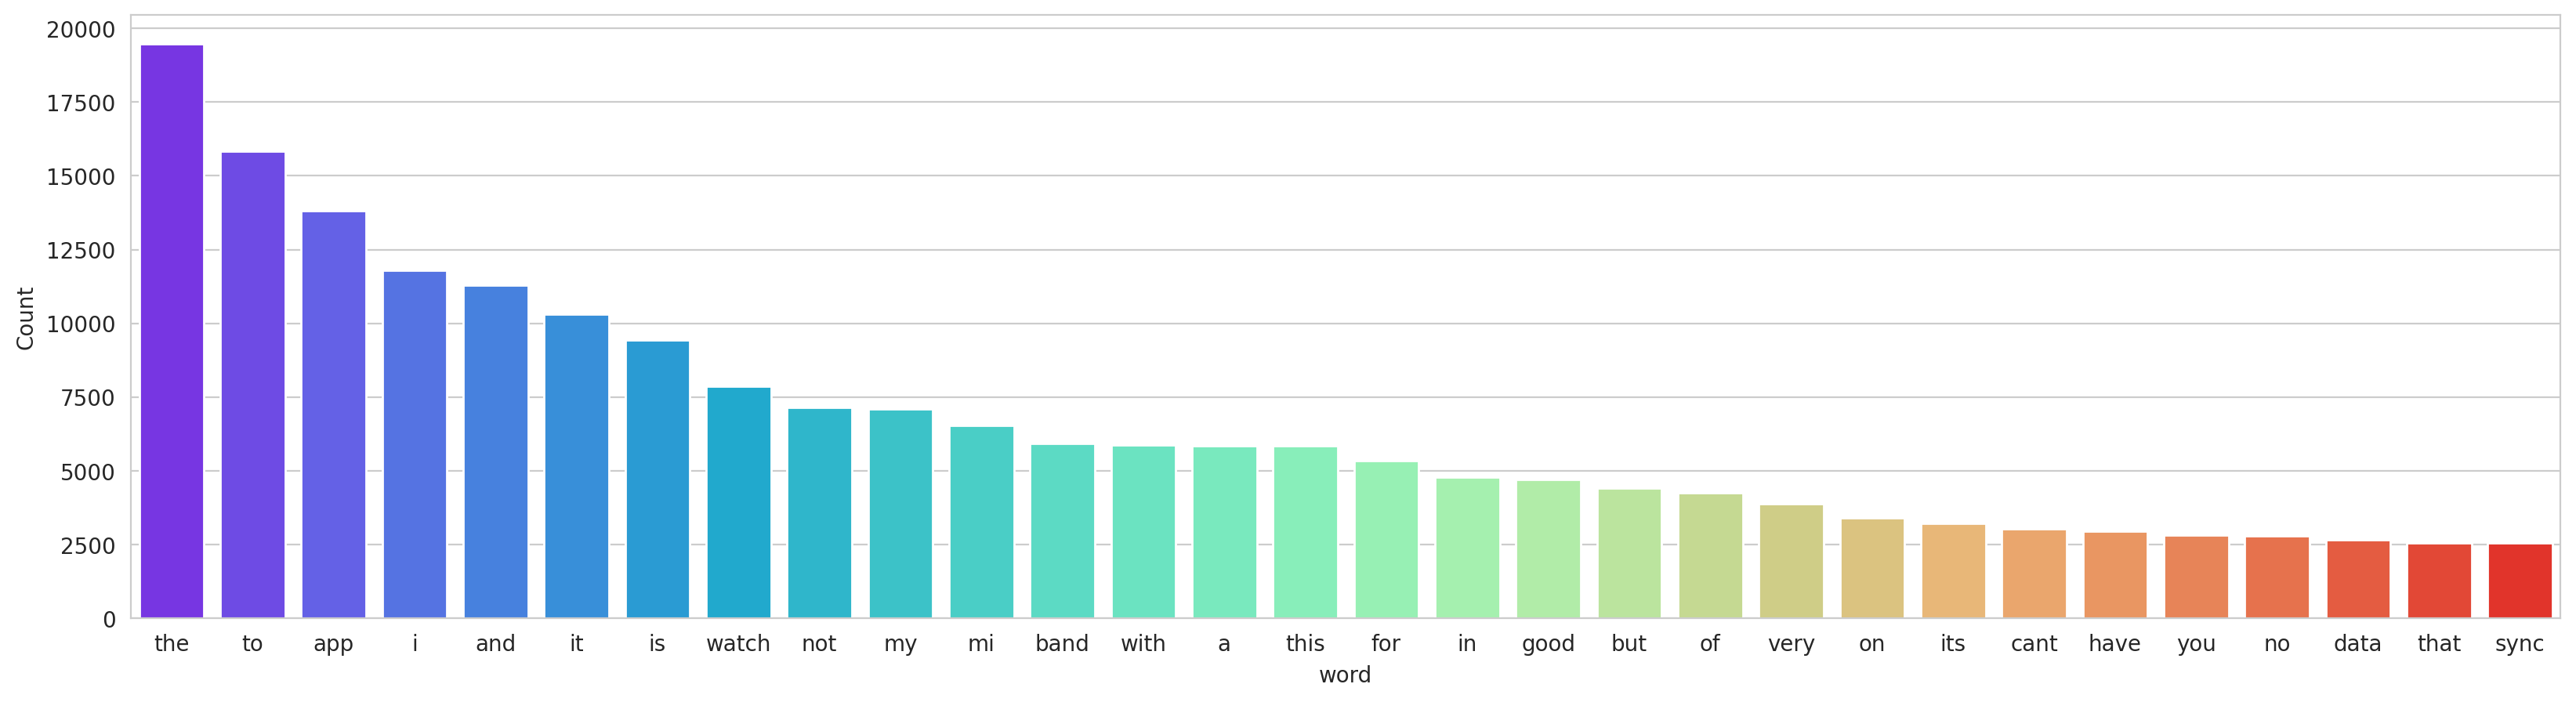

In [32]:
freq_words(df_mifit['content'])

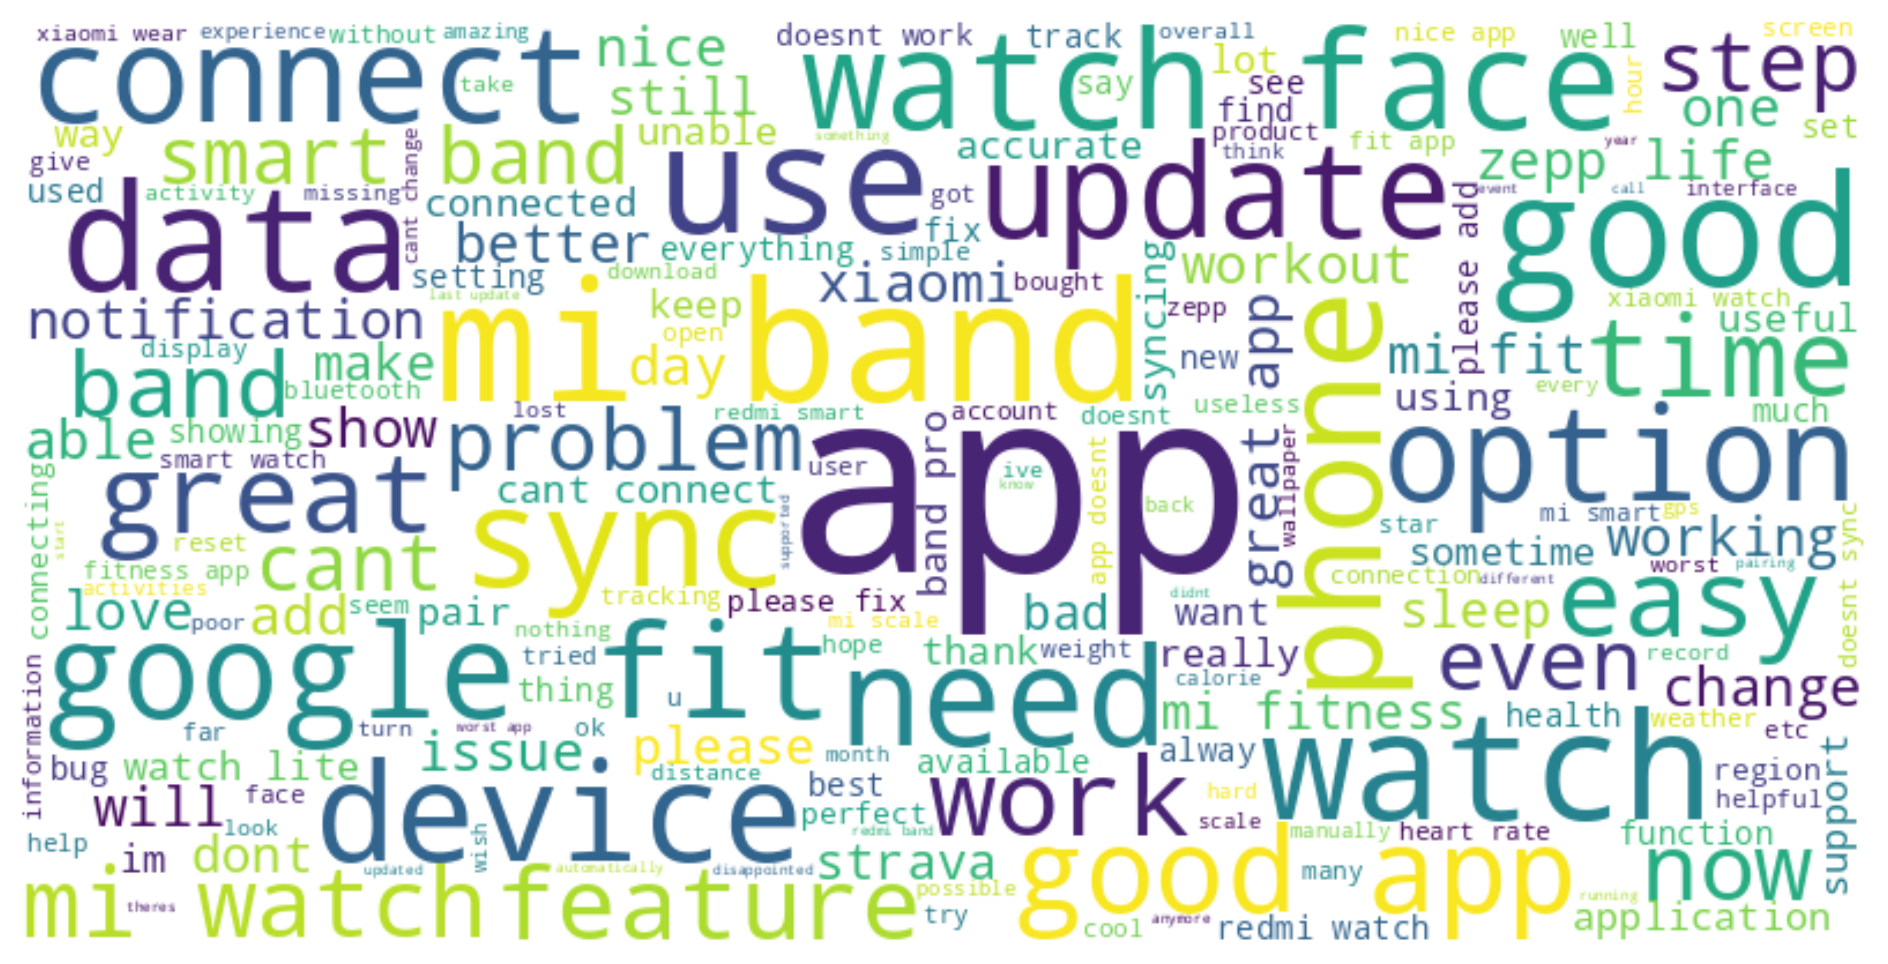

In [33]:
# Join all of the words in the 'content' in one string
all_words_before = ' '.join(df_mifit['content'])

# WordCloud before removing stopwords
wordcloud_before = WordCloud(width=800, height=400, background_color='white').generate(all_words_before)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_before, interpolation='bilinear')
plt.axis('off')
plt.show()

## Expand Contractions



In [34]:
!pip install spacy
!pip install contractions
import spacy
import contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 8.4 MB/s eta 0:00:00


In [35]:
def expand_contractions(text):
    return contractions.fix(text)  # "can't" → "cannot"

In [36]:
df_mifit['content'] = df_mifit['content'].apply(expand_contractions)

In [37]:
df_mifit['content'].head()

1                                              just bought the xiaomi watch s4 to find its not supported by mi fitness yet please let me know when the watch will be looking forward to using these together
2                                                                                                                                                                            add padel and wing chun workout
3    i am a new user from amazfit gts 4 mini unfortunately something is missing when i upload my activity to strava the name of the device does not show under the activity on strava its disappointing t...
5                                                                                                                                  not going to lie without this app its going to be the same with the watch
7                                                                                       for some reason it says that its 2009 so i cannot put my real age so for now i guess i am a 48 year old man pls help
Name: content, dtype: object

## Tokenization

In [38]:
!pip install nltk

In [39]:
import nltk
from nltk.tokenize import word_tokenize

# Download the 'punkt_tab' resource if it's not already downloaded
nltk.download('punkt_tab')

# Tokenize the 'cleaned_text' column
df_mifit['token'] = df_mifit['content'].apply(word_tokenize)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [40]:
# Display results
print(df_mifit[['content', 'token']])

                                                                                                                                                                                                       content  \
1                                                just bought the xiaomi watch s4 to find its not supported by mi fitness yet please let me know when the watch will be looking forward to using these together   
2                                                                                                                                                                              add padel and wing chun workout   
3      i am a new user from amazfit gts 4 mini unfortunately something is missing when i upload my activity to strava the name of the device does not show under the activity on strava its disappointing t...   
5                                                                                                                                    not going to lie without th

In [41]:
df_mifit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29530 entries, 1 to 43914
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   content               29530 non-null  object        
 1   score                 29530 non-null  int64         
 2   thumbsUpCount         29530 non-null  int64         
 3   reviewCreatedVersion  26321 non-null  object        
 4   at                    29530 non-null  datetime64[ns]
 5   appVersion            26321 non-null  object        
 6   id                    29530 non-null  int64         
 7   sentiment_polarity    29530 non-null  float64       
 8   sentiment_subjective  29530 non-null  float64       
 9   sentiment_rating      29530 non-null  object        
 10  token                 29530 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 3.7+ MB


## Removing stopwords

In [42]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Get English stopwords
english_stopwords = stopwords.words('english')

# Add 'app' to the stopwords list
english_stopwords.extend(['app'])

# Apply the extended stopwords to your DataFrame
df_mifit["token_after_sr"] = df_mifit["token"].apply(lambda tokens: [word for word in tokens if word not in english_stopwords and word.isalpha()])
# Gabungkan token menjadi teks yang bersih dalam kolom cleaned_content
df_mifit["cleaned_content"] = df_mifit["token_after_sr"].apply(lambda tokens: ' '.join(tokens))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [43]:
df_mifit.head()

content  \
1                                            just bought the xiaomi watch s4 to find its not supported by mi fitness yet please let me know when the watch will be looking forward to using these together   
2                                                                                                                                                                          add padel and wing chun workout   
3  i am a new user from amazfit gts 4 mini unfortunately something is missing when i upload my activity to strava the name of the device does not show under the activity on strava its disappointing t...   
5                                                                                                                                not going to lie without this app its going to be the same with the watch   
7                                                                                     for some reason it says that its 2009 so i cannot put my real age so for now i guess i am a 48 year old man pls help   

   score  thumbsUpCount reviewCreatedVersion                  at appVersion  \
1      1              0              3.37.2i 2025-04-01 21:09:48    3.37.2i   
2      2              0              3.37.2i 2025-04-01 20:52:01    3.37.2i   
3      3              0              3.37.2i 2025-04-01 18:12:49    3.37.2i   
5      5              0              3.37.2i 2025-04-01 16:33:21    3.37.2i   
7      4              0              3.37.2i 2025-04-01 14:01:14    3.37.2i   

   id  sentiment_polarity  sentiment_subjective sentiment_rating  \
1   2            0.000000              0.000000         Negative   
2   3            0.000000              0.000000         Negative   
3   4           -0.112727              0.620909          Neutral   
5   6            0.000000              0.125000         Positive   
7   8            0.150000              0.250000         Positive   

                                                                                                                                                                                                     token  \
1             [just, bought, the, xiaomi, watch, s4, to, find, its, not, supported, by, mi, fitness, yet, please, let, me, know, when, the, watch, will, be, looking, forward, to, using, these, together]   
2                                                                                                                                                                   [add, padel, and, wing, chun, workout]   
3  [i, am, a, new, user, from, amazfit, gts, 4, mini, unfortunately, something, is, missing, when, i, upload, my, activity, to, strava, the, name, of, the, device, does, not, show, under, the, activi...   
5                                                                                                               [not, going, to, lie, without, this, app, its, going, to, be, the, same, with, the, watch]   
7                                                     [for, some, reason, it, says, that, its, 2009, so, i, can, not, put, my, real, age, so, for, now, i, guess, i, am, a, 48, year, old, man, pls, help]   

                                                                                                                                              token_after_sr  \
1                                    [bought, xiaomi, watch, find, supported, mi, fitness, yet, please, let, know, watch, looking, forward, using, together]   
2                                                                                                                          [add, padel, wing, chun, workout]   
3  [new, user, amazfit, gts, mini, unfortunately, something, missing, upload, activity, strava, name, device, show, activity, strava, disappointing, honest]   
5                                                                                                                        [going, lie, without, going, watch]   
7                                    

<ipython-input-31-b9ff2e5d559c>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=d, x="word", y="count", palette="rainbow")


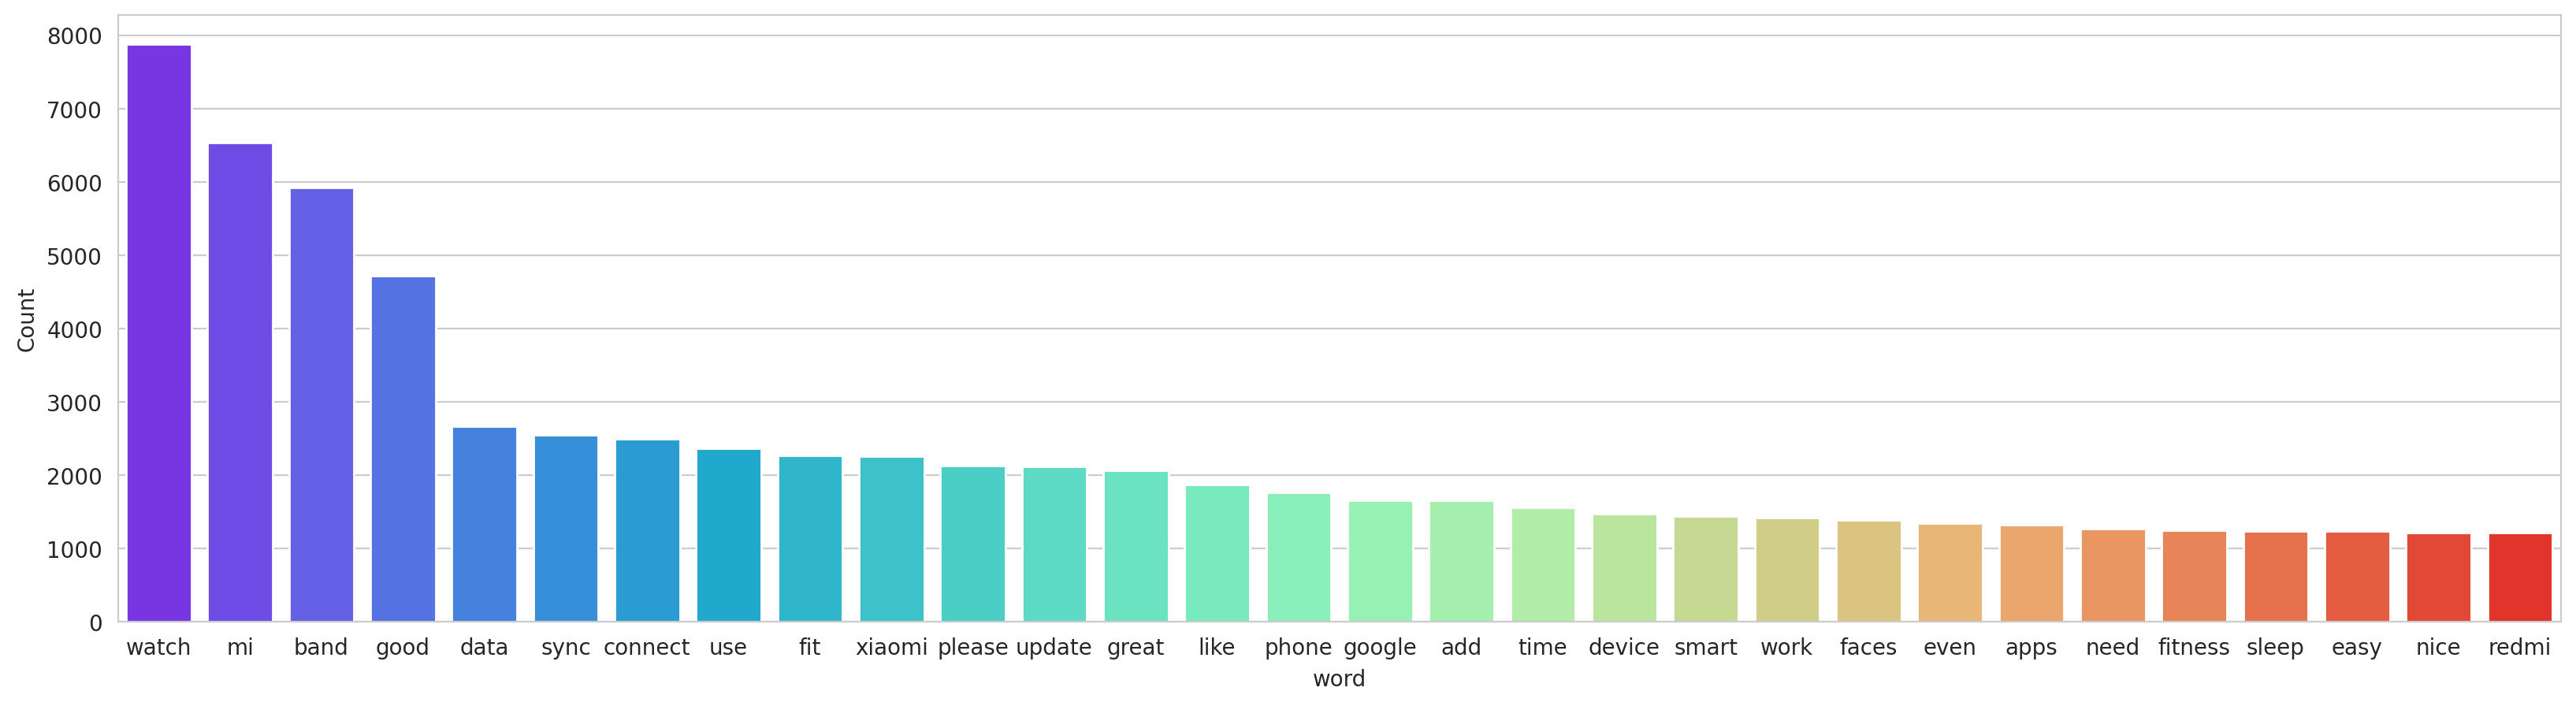

In [44]:
# Frekuensi kata setelah pembersihan stopwords
freq_words(df_mifit['cleaned_content'])

## Stemming & Lemmatization

In [45]:
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
nltk.download('wordnet')

# Inisialisasi lemmatizer dan stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Fungsi untuk lemmatization
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

# Fungsi untuk stemming
def stem_tokens(tokens):
    return [stemmer.stem(word) for word in tokens]

# Terapkan lemmatization ke kolom token_after_sr
df_mifit["token_after_lemma"] = df_mifit["token_after_sr"].apply(lemmatize_tokens)

# Terapkan stemming ke kolom token_after_sr
df_mifit["token_after_stem"] = df_mifit["token_after_sr"].apply(stem_tokens)

# Gabungkan kembali token setelah lemmatization menjadi satu string
df_mifit["cleaned_content"] = df_mifit["token_after_lemma"].apply(lambda tokens: ' '.join(tokens))

# Tampilkan 5 baris pertama DataFrame untuk verifikasi
df_mifit.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


content  \
1                                            just bought the xiaomi watch s4 to find its not supported by mi fitness yet please let me know when the watch will be looking forward to using these together   
2                                                                                                                                                                          add padel and wing chun workout   
3  i am a new user from amazfit gts 4 mini unfortunately something is missing when i upload my activity to strava the name of the device does not show under the activity on strava its disappointing t...   
5                                                                                                                                not going to lie without this app its going to be the same with the watch   
7                                                                                     for some reason it says that its 2009 so i cannot put my real age so for now i guess i am a 48 year old man pls help   

   score  thumbsUpCount reviewCreatedVersion                  at appVersion  \
1      1              0              3.37.2i 2025-04-01 21:09:48    3.37.2i   
2      2              0              3.37.2i 2025-04-01 20:52:01    3.37.2i   
3      3              0              3.37.2i 2025-04-01 18:12:49    3.37.2i   
5      5              0              3.37.2i 2025-04-01 16:33:21    3.37.2i   
7      4              0              3.37.2i 2025-04-01 14:01:14    3.37.2i   

   id  sentiment_polarity  sentiment_subjective sentiment_rating  \
1   2            0.000000              0.000000         Negative   
2   3            0.000000              0.000000         Negative   
3   4           -0.112727              0.620909          Neutral   
5   6            0.000000              0.125000         Positive   
7   8            0.150000              0.250000         Positive   

                                                                                                                                                                                                     token  \
1             [just, bought, the, xiaomi, watch, s4, to, find, its, not, supported, by, mi, fitness, yet, please, let, me, know, when, the, watch, will, be, looking, forward, to, using, these, together]   
2                                                                                                                                                                   [add, padel, and, wing, chun, workout]   
3  [i, am, a, new, user, from, amazfit, gts, 4, mini, unfortunately, something, is, missing, when, i, upload, my, activity, to, strava, the, name, of, the, device, does, not, show, under, the, activi...   
5                                                                                                               [not, going, to, lie, without, this, app, its, going, to, be, the, same, with, the, watch]   
7                                                     [for, some, reason, it, says, that, its, 2009, so, i, can, not, put, my, real, age, so, for, now, i, guess, i, am, a, 48, year, old, man, pls, help]   

                                                                                                                                              token_after_sr  \
1                                    [bought, xiaomi, watch, find, supported, mi, fitness, yet, please, let, know, watch, looking, forward, using, together]   
2                                                                                                                          [add, padel, wing, chun, workout]   
3  [new, user, amazfit, gts, mini, unfortunately, something, missing, upload, activity, strava, name, device, show, activity, strava, disappointing, honest]   
5                                                                                                                        [going, lie, without, going, watch]   
7                                    

# Sentiment Analysis After Preprocessing

In [46]:
df_mifit2 = df_mifit.copy()

In [47]:
df_mifit2.drop(columns = ['sentiment_polarity', 'sentiment_subjective'])

content  \
1                                                just bought the xiaomi watch s4 to find its not supported by mi fitness yet please let me know when the watch will be looking forward to using these together   
2                                                                                                                                                                              add padel and wing chun workout   
3      i am a new user from amazfit gts 4 mini unfortunately something is missing when i upload my activity to strava the name of the device does not show under the activity on strava its disappointing t...   
5                                                                                                                                    not going to lie without this app its going to be the same with the watch   
7                                                                                         for some reason it says that its 2009 so i cannot put my real age so for now i guess i am a 48 year old man pls help   
...                                                                                                                                                                                                        ...   
43910                                                                                                                                                           its not possible to conect the redmi band help   
43911                                                                                                                                           how to change time format i cannot find 1224 hours time format   
43912                                          the clock is still 24hrs format even if i set the phone clock to 12hrs i reboot and sync the band to the app many times but still stuck with 24hrs clock format   
43913                                                                                                 this app is ridiculous when i press the add device button it is empty how to connectim unable to connect   
43914                                                                                                                   i am using mi watch color but this app not showing any device to add please rectify it   

       score  thumbsUpCount reviewCreatedVersion                  at  \
1          1              0              3.37.2i 2025-04-01 21:09:48   
2          2              0              3.37.2i 2025-04-01 20:52:01   
3          3              0              3.37.2i 2025-04-01 18:12:49   
5          5              0              3.37.2i 2025-04-01 16:33:21   
7          4              0              3.37.2i 2025-04-01 14:01:14   
...      ...            ...                  ...                 ...   
43910      1              3                 None 2020-06-30 20:08:26   
43911      3              4         1.1.16i-play 2020-06-30 09:38:49   
43912      3             16         1.1.16i-play 2020-06-22 03:50:39   
43913      1              9         1.1.16i-play 2020-06-21 10:05:56   
43914      1              4                 None 2020-06-03 03:59:38   

         appVersion     id sentiment_rating  \
1           3.37.2i      2         Negative   
2           3.37.2i      3         Negative   
3           3.37.2i      4          Neutral   
5           3.37.2i      6         Positive   
7           3.37.2i      8         Positive   
...             ...    ...              ...   
43910          None  43911         Negative   
43911  1.1.16i-play  43912          Neutral   
43912  1.1.16i-play  43913          Neutral   
43913  1.1.16i-play  43914         Negative   
43914          None  43915         Negative   

                                                                                                                                                                                                         token  \
1                 [just, bought, the, 

In [48]:
df_mifit2['cleaned_content'] = df_mifit2['cleaned_content'].fillna('')

df_mifit2['sentiment_polarity'] = df_mifit2['cleaned_content'].apply(lambda x: TextBlob(x).polarity)
df_mifit2['sentiment_subjective'] = df_mifit2['cleaned_content'].apply(lambda x: TextBlob(x).subjectivity)


# Display the results
df_mifit2


content  \
1                                                just bought the xiaomi watch s4 to find its not supported by mi fitness yet please let me know when the watch will be looking forward to using these together   
2                                                                                                                                                                              add padel and wing chun workout   
3      i am a new user from amazfit gts 4 mini unfortunately something is missing when i upload my activity to strava the name of the device does not show under the activity on strava its disappointing t...   
5                                                                                                                                    not going to lie without this app its going to be the same with the watch   
7                                                                                         for some reason it says that its 2009 so i cannot put my real age so for now i guess i am a 48 year old man pls help   
...                                                                                                                                                                                                        ...   
43910                                                                                                                                                           its not possible to conect the redmi band help   
43911                                                                                                                                           how to change time format i cannot find 1224 hours time format   
43912                                          the clock is still 24hrs format even if i set the phone clock to 12hrs i reboot and sync the band to the app many times but still stuck with 24hrs clock format   
43913                                                                                                 this app is ridiculous when i press the add device button it is empty how to connectim unable to connect   
43914                                                                                                                   i am using mi watch color but this app not showing any device to add please rectify it   

       score  thumbsUpCount reviewCreatedVersion                  at  \
1          1              0              3.37.2i 2025-04-01 21:09:48   
2          2              0              3.37.2i 2025-04-01 20:52:01   
3          3              0              3.37.2i 2025-04-01 18:12:49   
5          5              0              3.37.2i 2025-04-01 16:33:21   
7          4              0              3.37.2i 2025-04-01 14:01:14   
...      ...            ...                  ...                 ...   
43910      1              3                 None 2020-06-30 20:08:26   
43911      3              4         1.1.16i-play 2020-06-30 09:38:49   
43912      3             16         1.1.16i-play 2020-06-22 03:50:39   
43913      1              9         1.1.16i-play 2020-06-21 10:05:56   
43914      1              4                 None 2020-06-03 03:59:38   

         appVersion     id  sentiment_polarity  sentiment_subjective  \
1           3.37.2i      2            0.000000              0.000000   
2           3.37.2i      3            0.000000              0.000000   
3           3.37.2i      4           -0.112727              0.620909   
5           3.37.2i      6            0.000000              0.000000   
7           3.37.2i      8            0.150000              0.250000   
...             ...    ...                 ...                   ...   
43910          None  43911            0.000000              1.000000   
43911  1.1.16i-play  43912            0.000000              0.000000   
43912  1.1.16i-play  43913            0.500000              0.500000   
43913  1.1.16i-play  43914           -0.311111              0.666667   
43914          None  

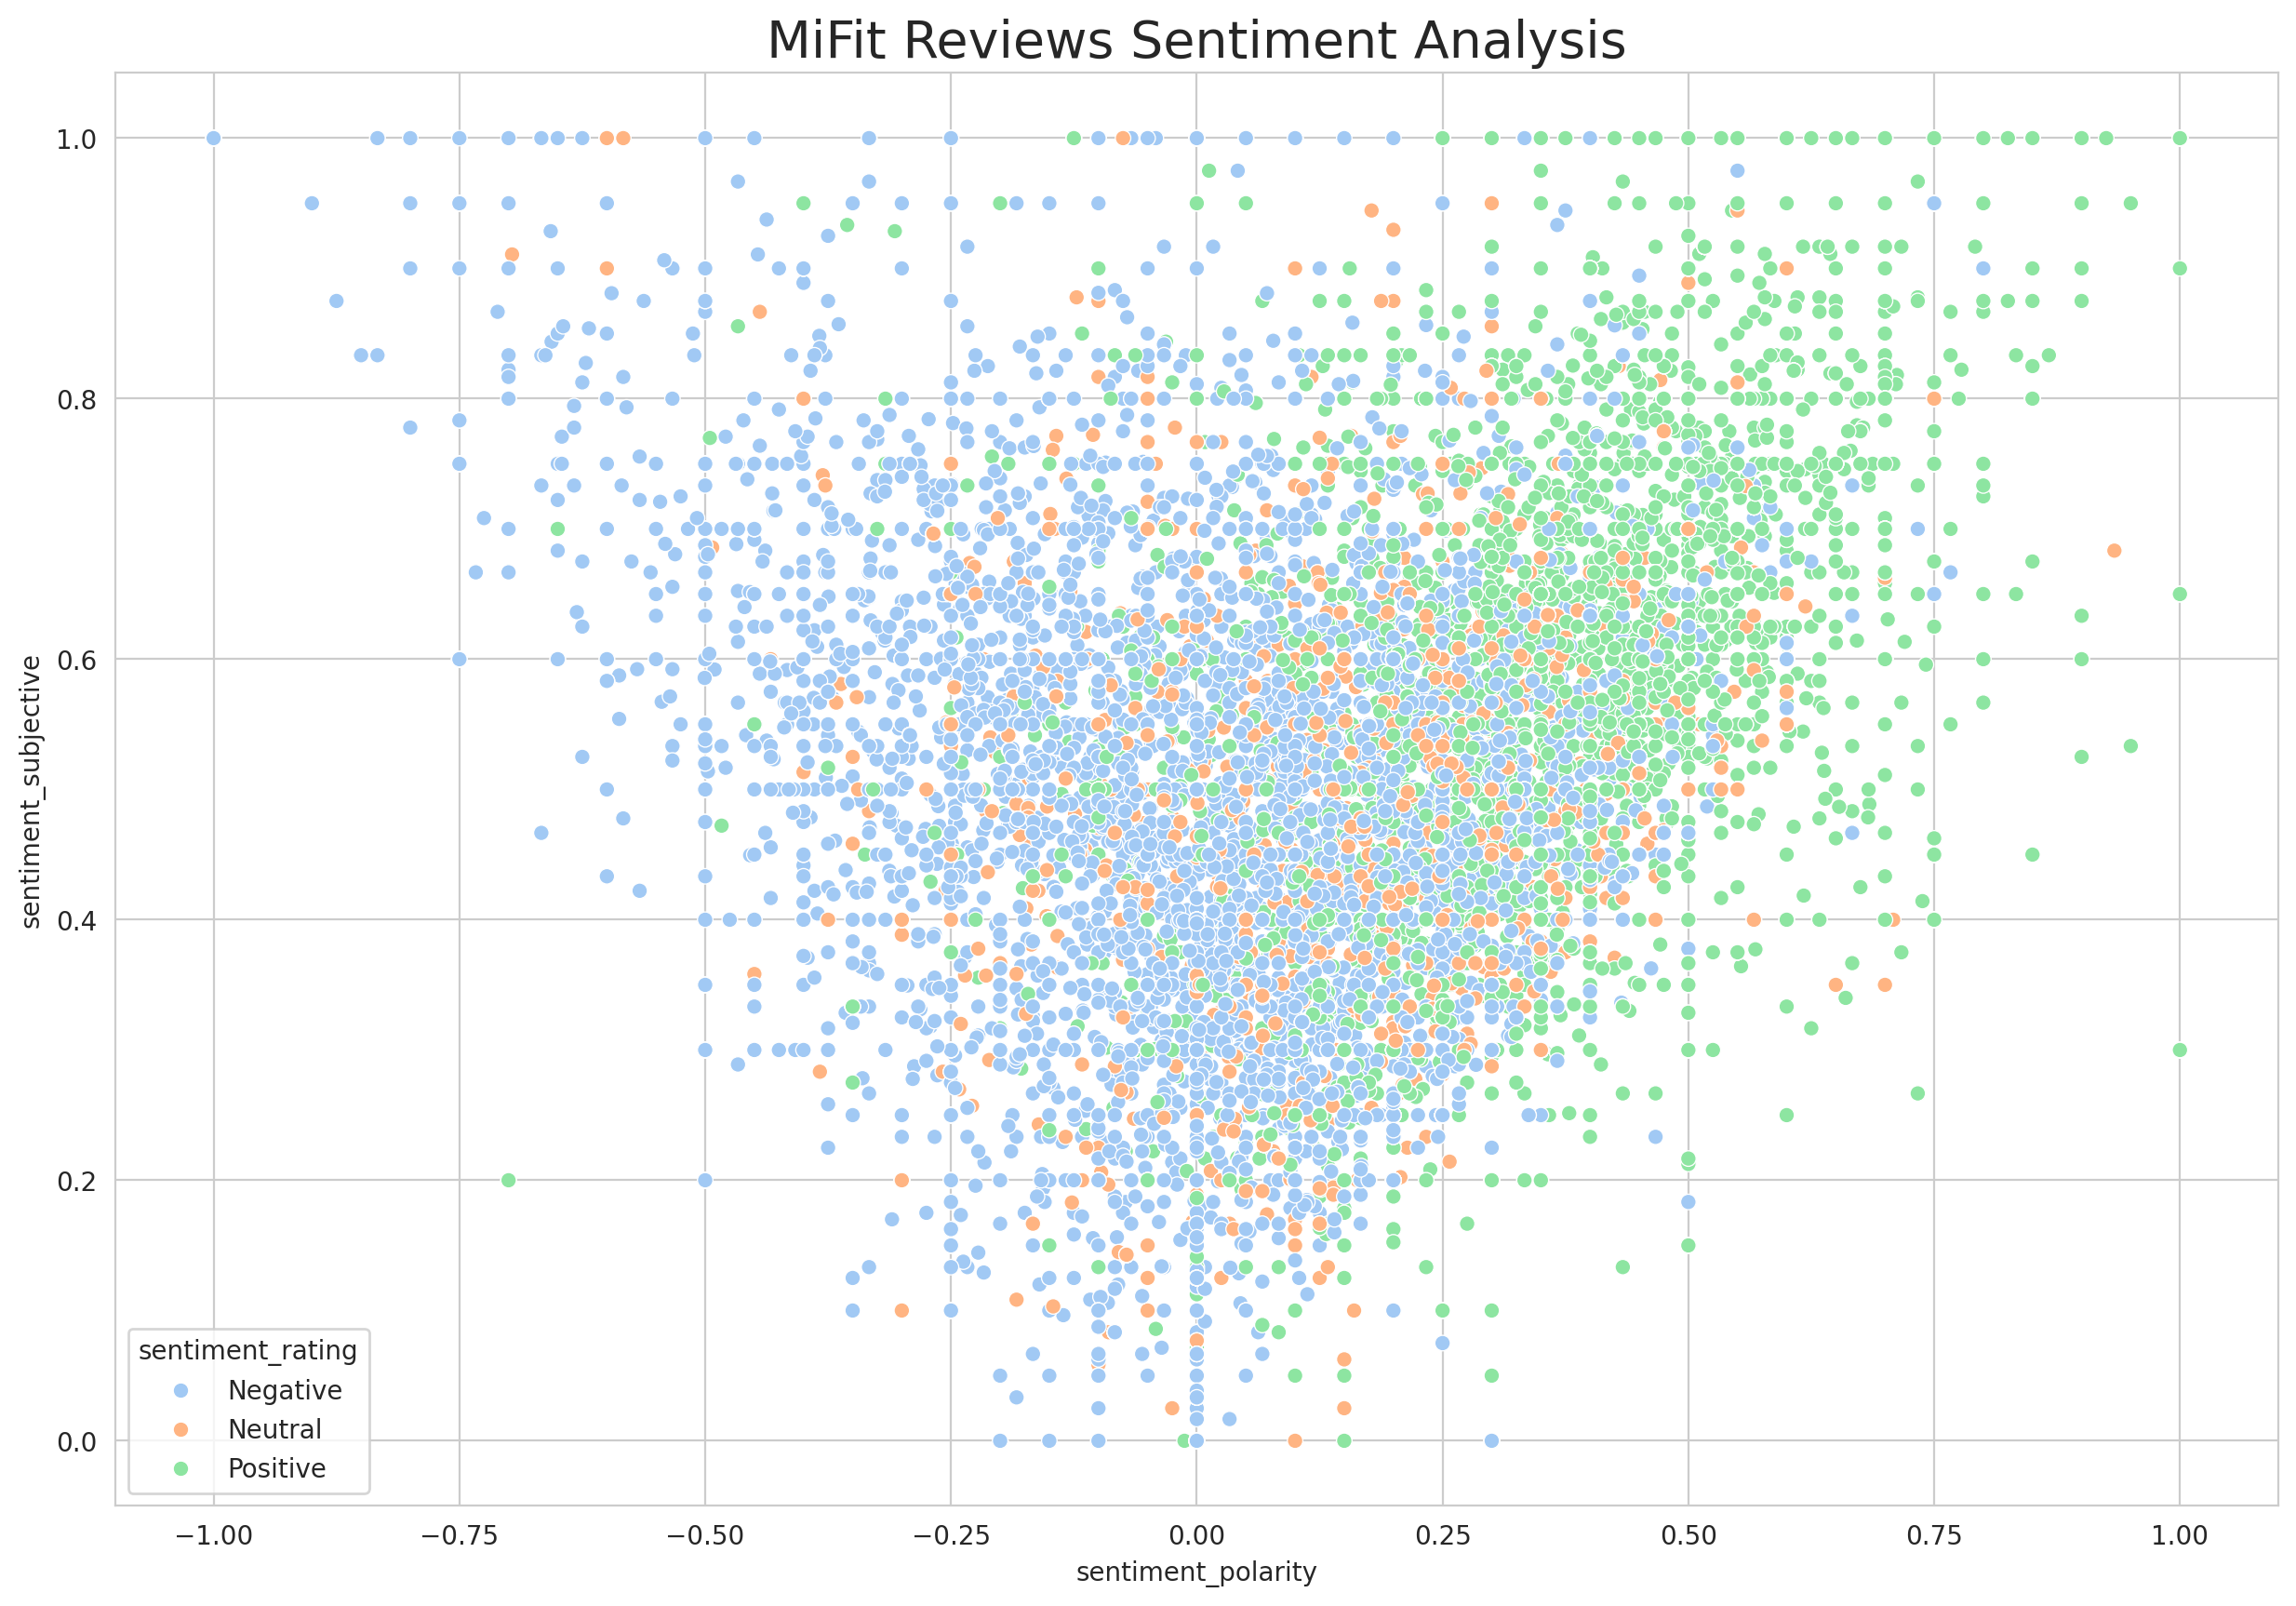

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
# Specify x and y using the 'x' and 'y' parameters within sns.scatterplot
sns.scatterplot(x=df_mifit2['sentiment_polarity'], y=df_mifit2['sentiment_subjective'],
                hue=df_mifit2['sentiment_rating'], edgecolor='white', palette="pastel")
plt.title("MiFit Reviews Sentiment Analysis", fontsize=20)
plt.show()

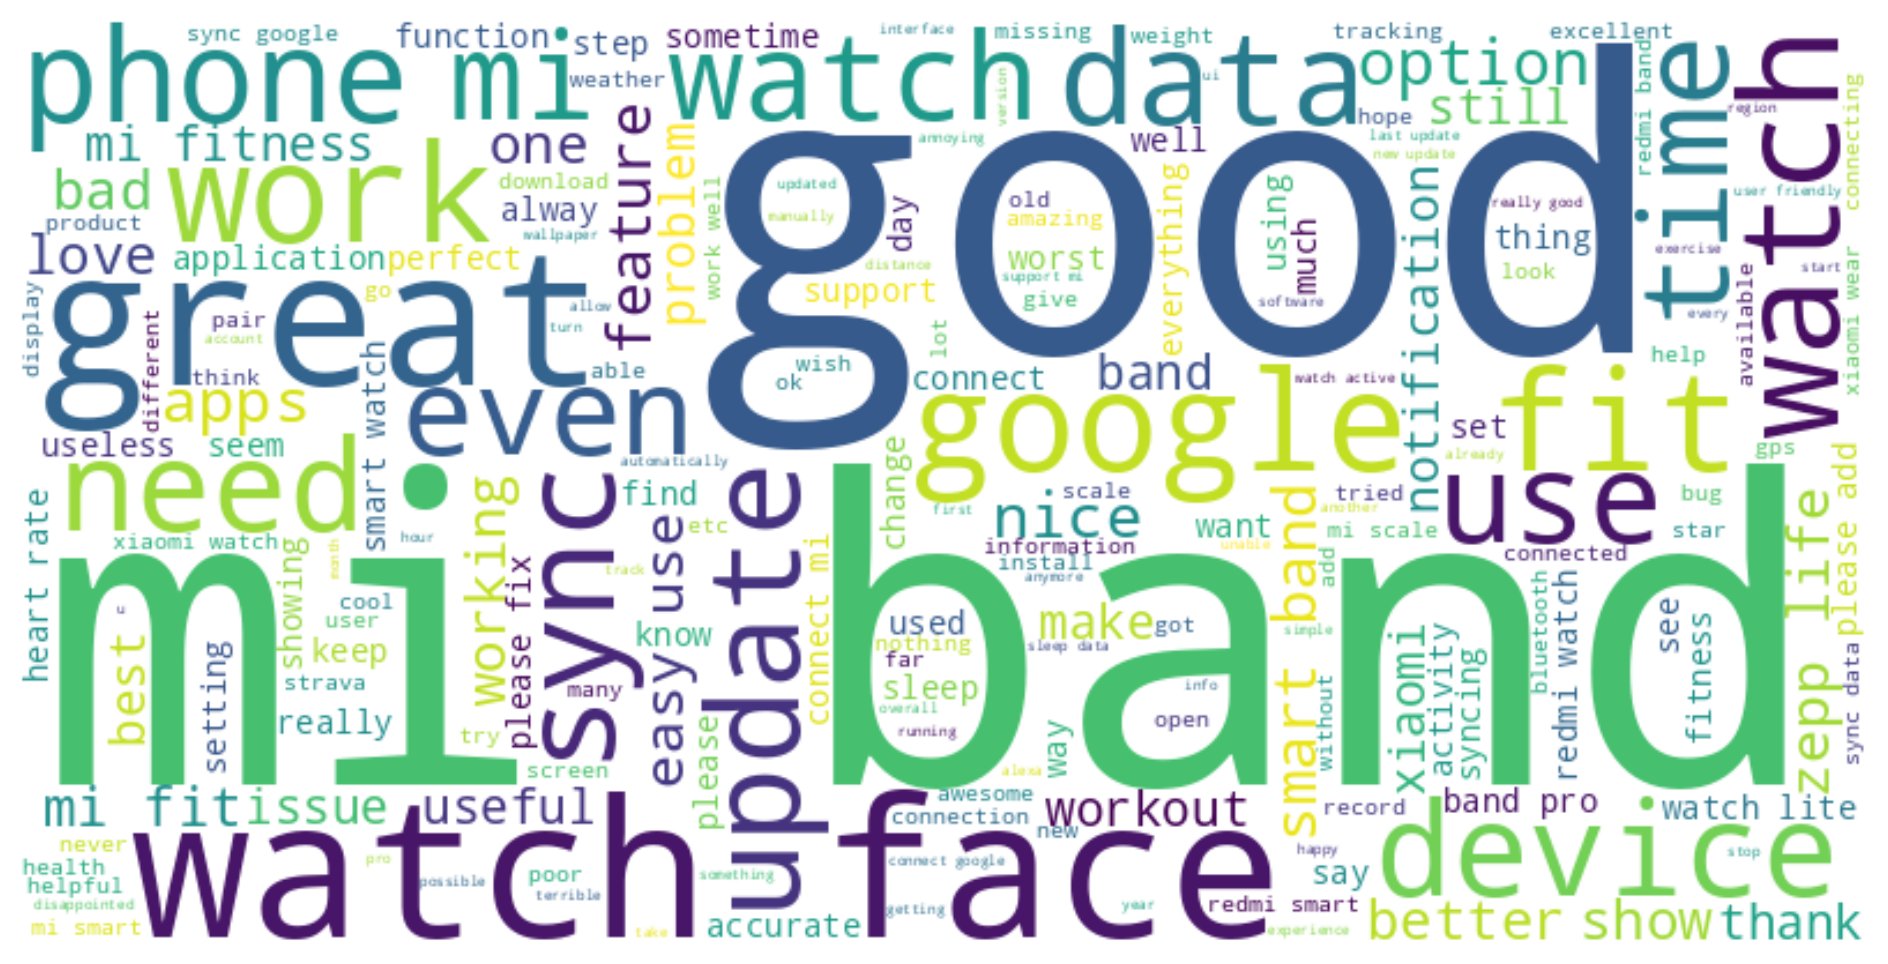

In [50]:
# Join all of the words in the 'content' in one string
all_words_before = ' '.join(df_mifit2['cleaned_content'])

# WordCloud before removing stopwords
wordcloud_before = WordCloud(width=800, height=400, background_color='white').generate(all_words_before)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_before, interpolation='bilinear')
plt.axis('off')
plt.show()

# Export to CSV

In [51]:
df_mifit2.to_csv('/content/drive/My Drive/PBA/MiFit_Reviews(processed).csv', index=False)

# Exploratory Data Analysis

## Score Distribution

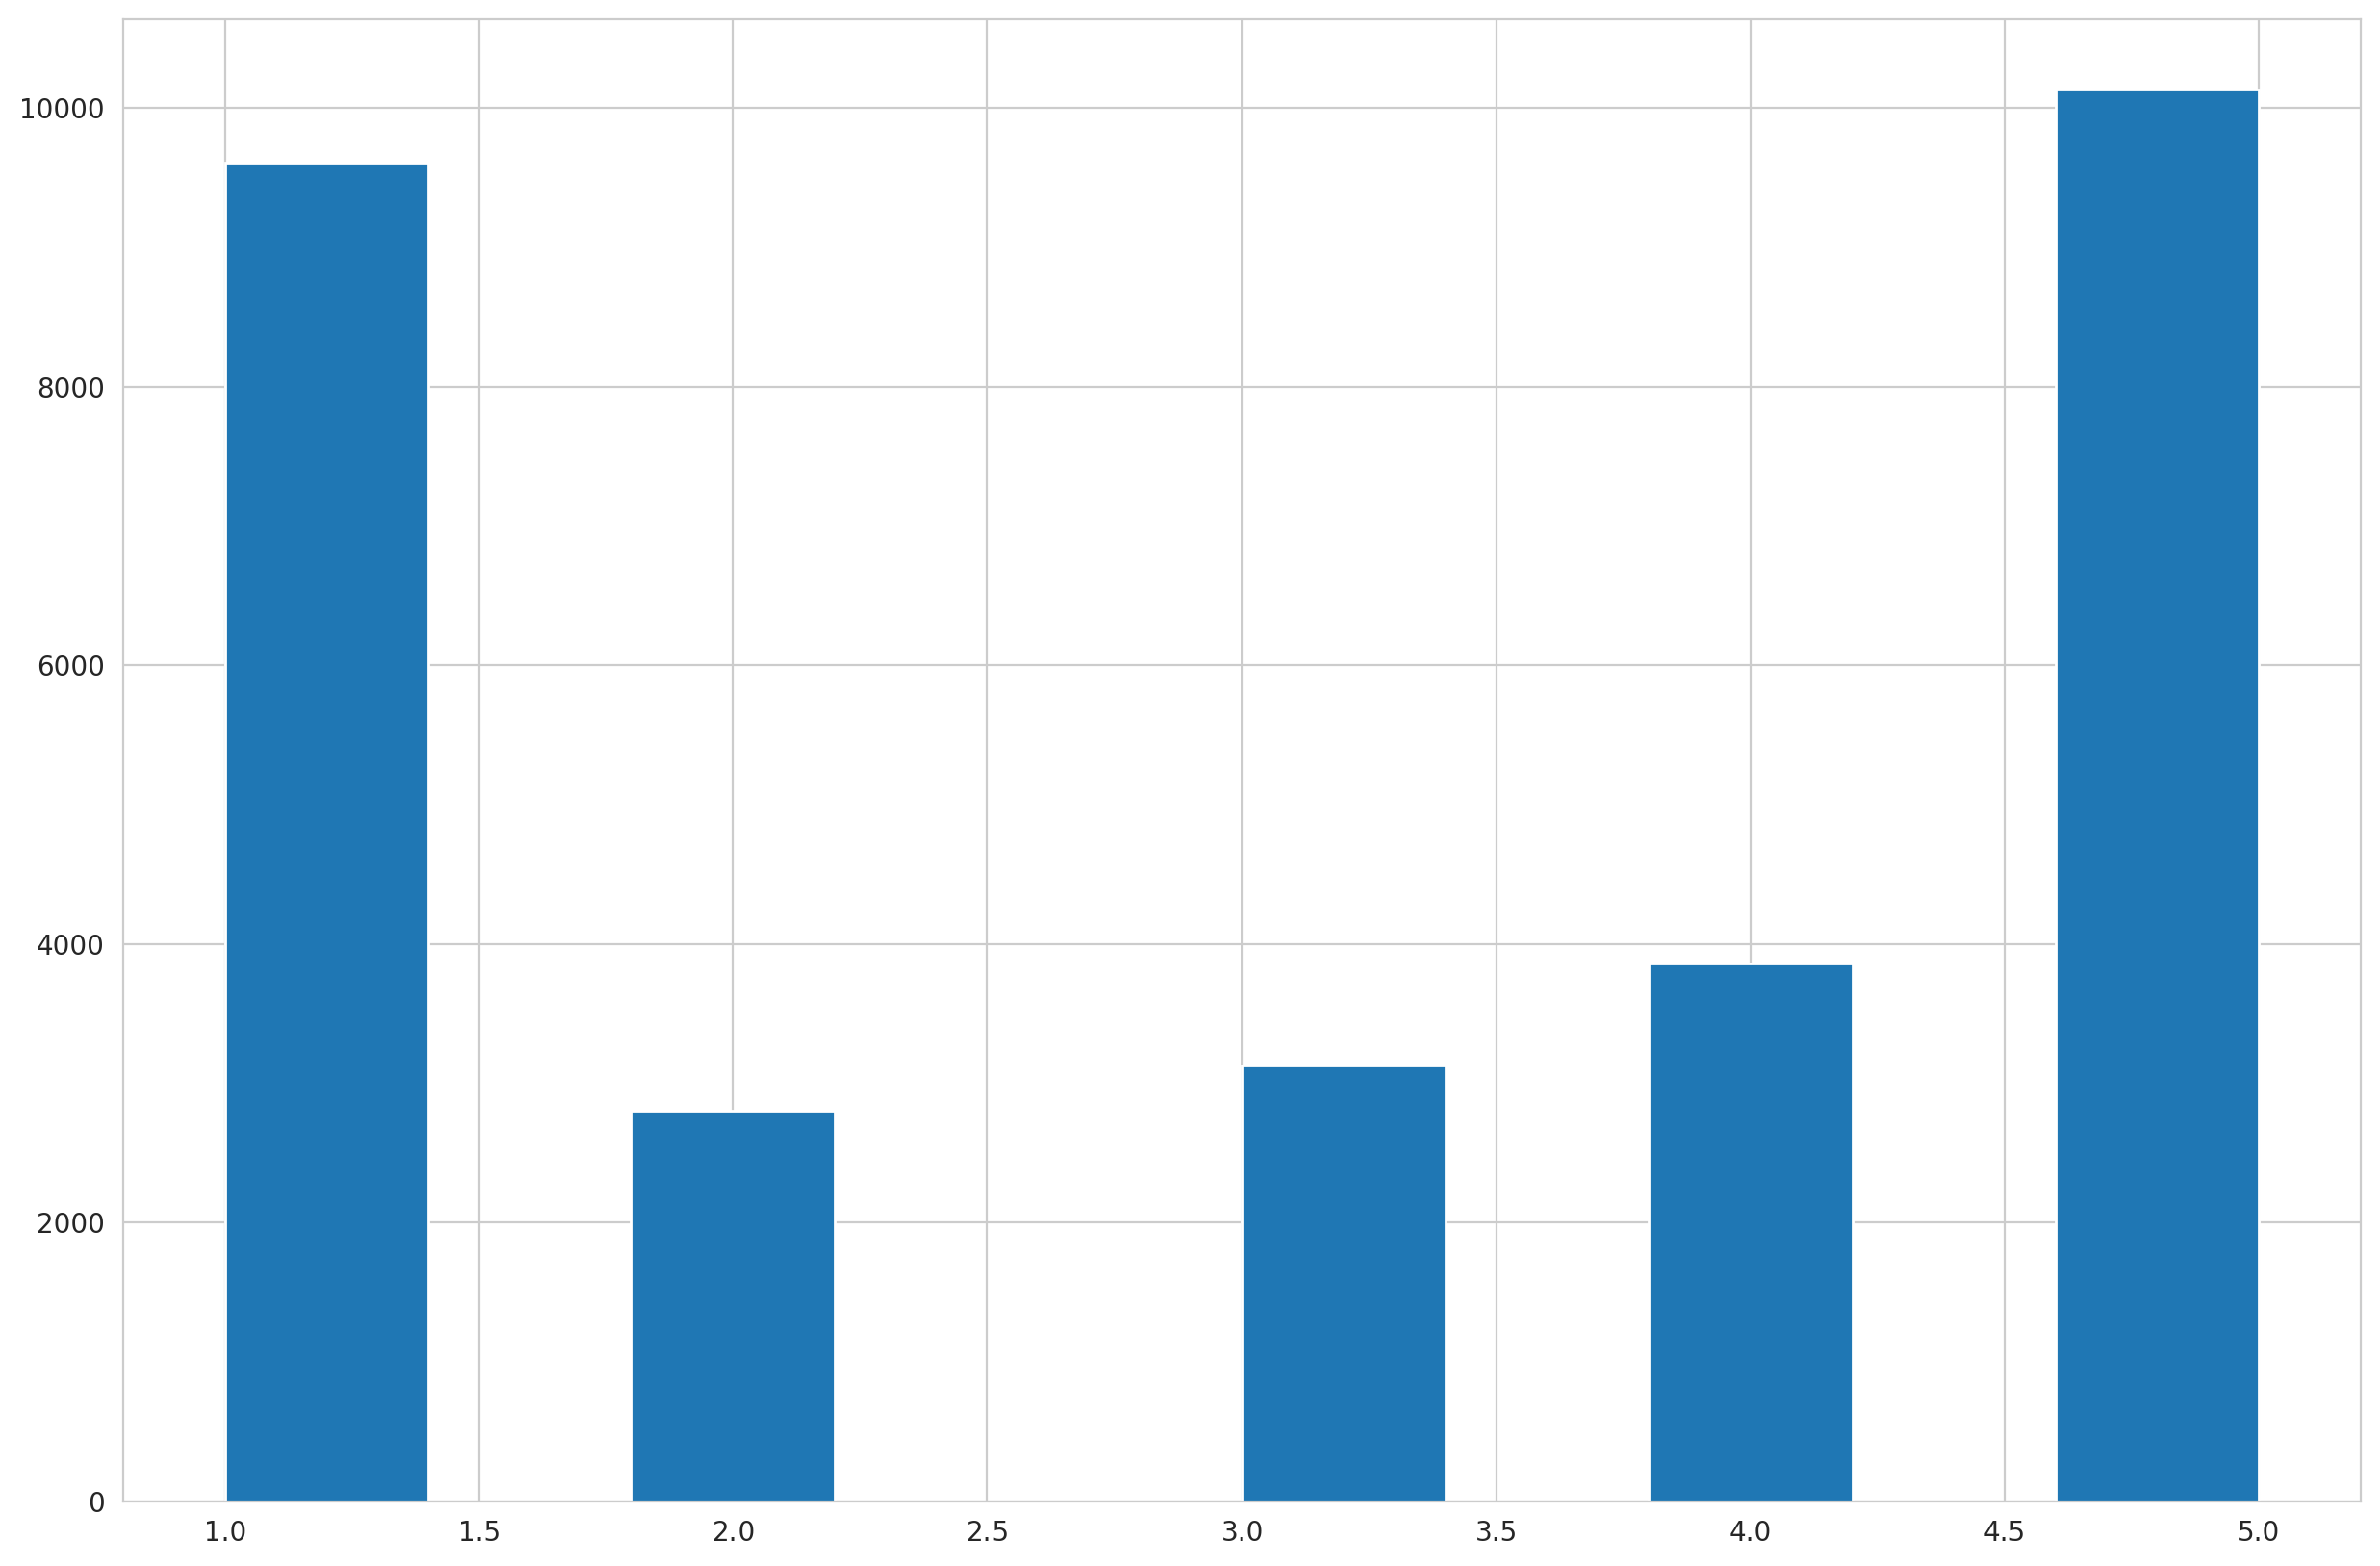

In [52]:
plt.hist(df_mifit2['score'])
plt.show()

## Reviews per Year

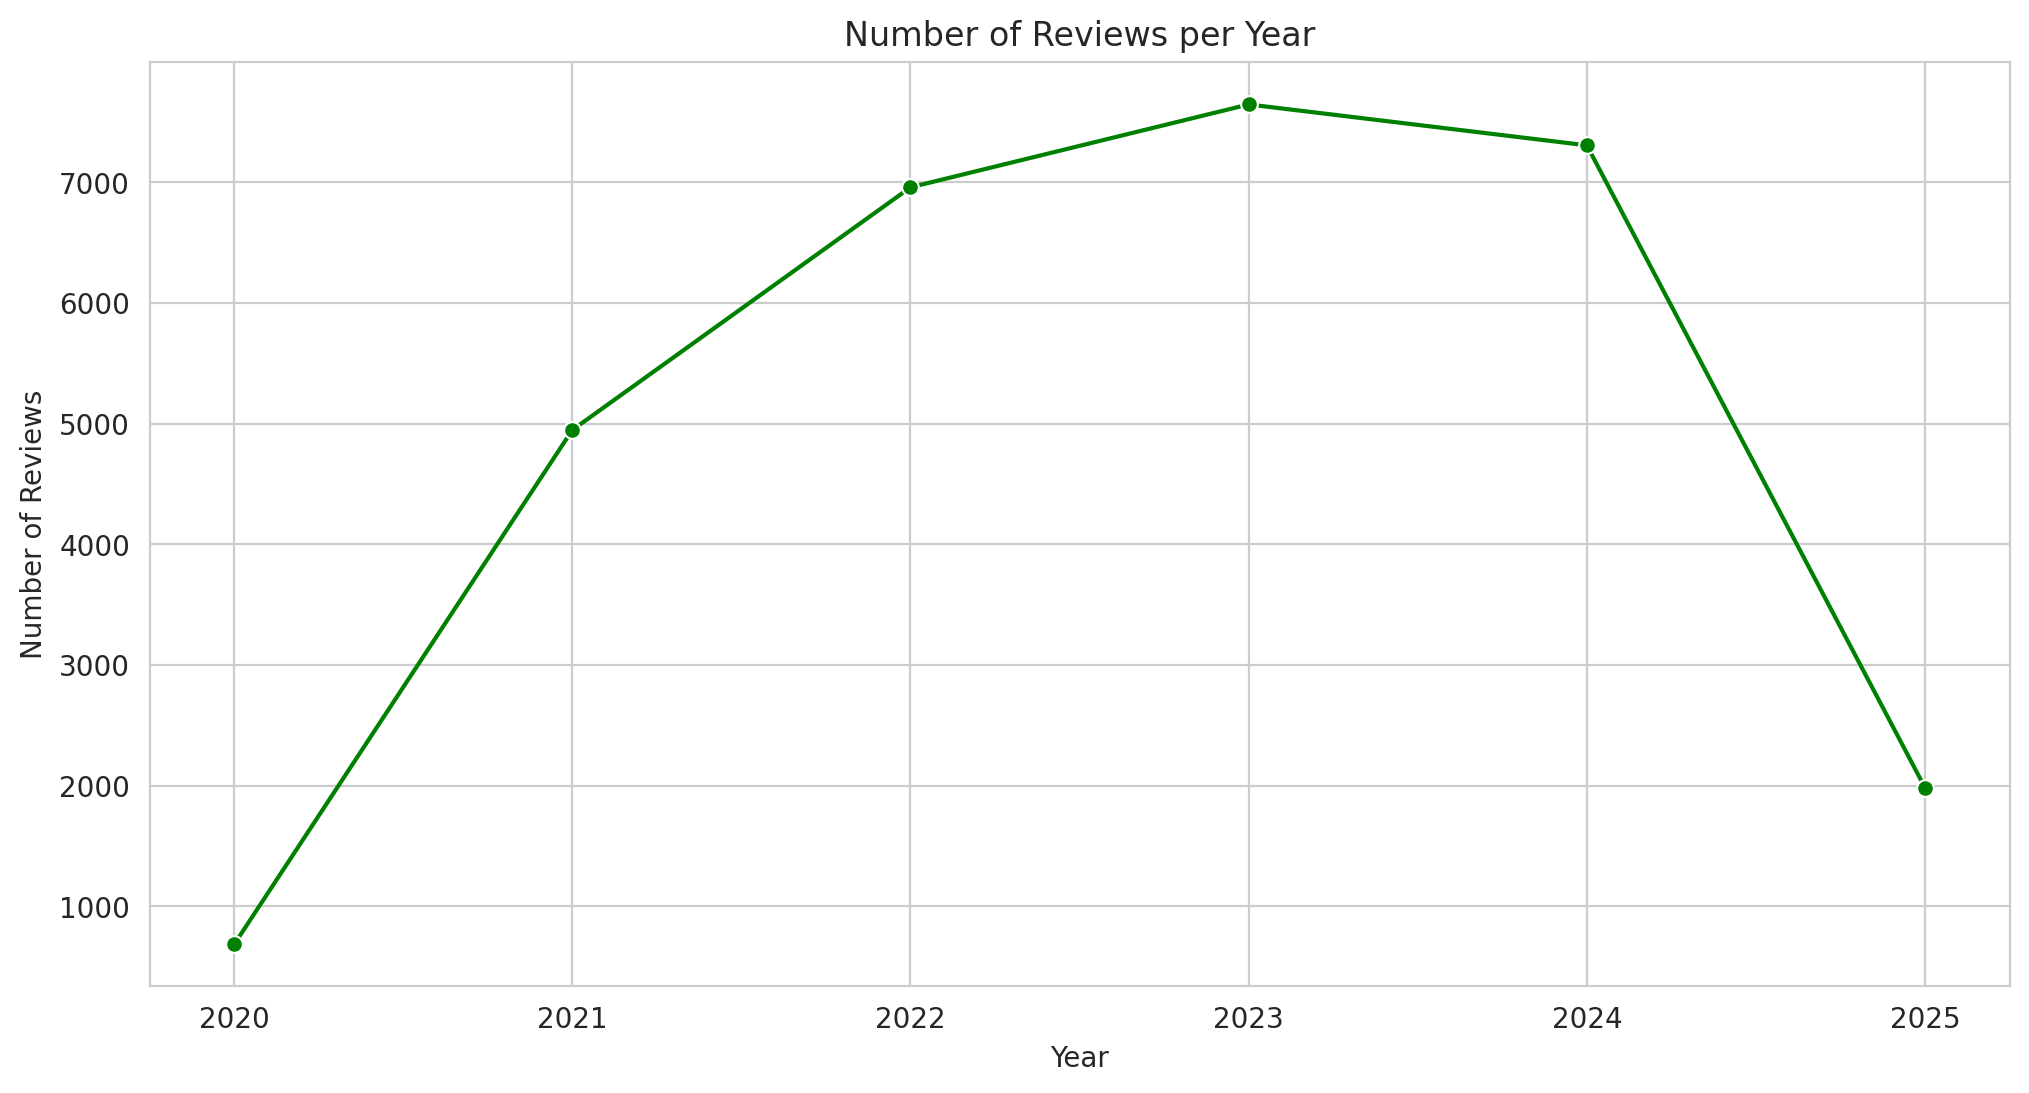

In [53]:
df_mifit2['at'] = pd.to_datetime(df_mifit2['at'])
df_mifit2['year'] = df_mifit2['at'].dt.year
year_counts = df_mifit2['year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o', color='green')
plt.title('Number of Reviews per Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.show()

## Monthly Reviews Over Year

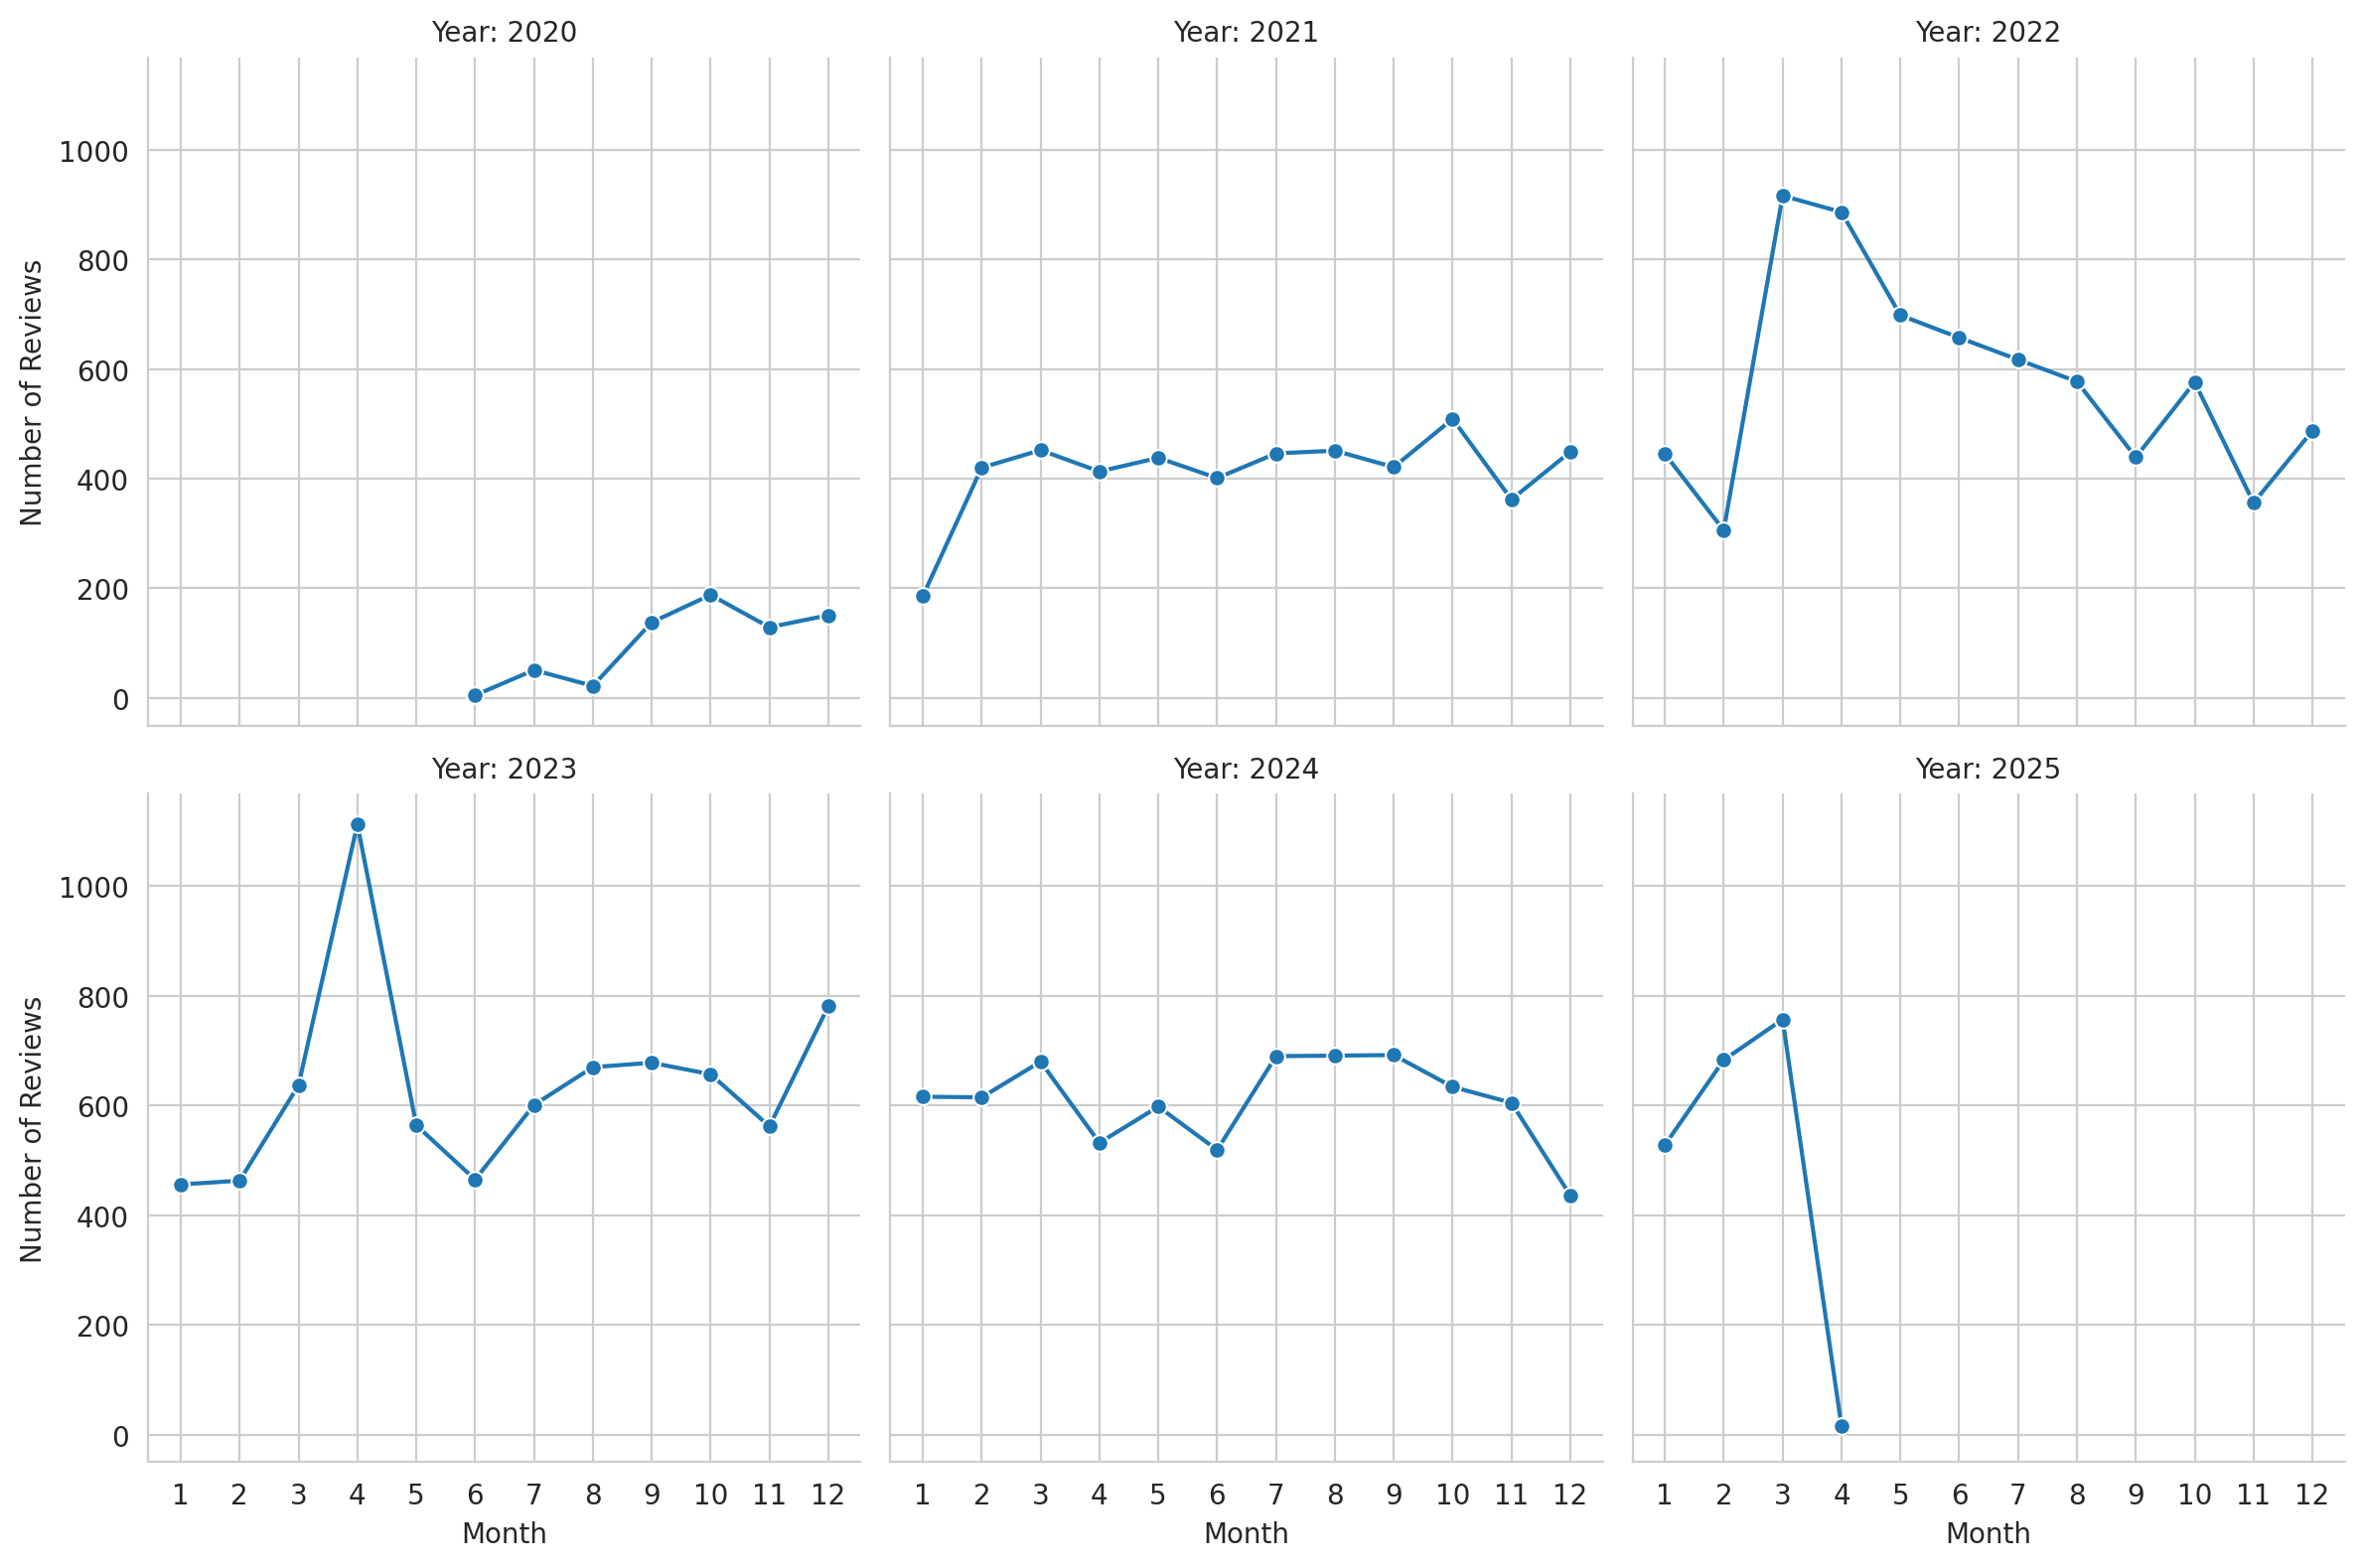

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ekstrak tahun dan bulan
df_mifit2['year'] = df_mifit2['at'].dt.year
df_mifit2['month'] = df_mifit2['at'].dt.month

# Group by year and month and count reviews
reviews_per_month = df_mifit2.groupby(['year', 'month'])['id'].count().reset_index()

# Buat grid plot dengan FacetGrid
g = sns.FacetGrid(reviews_per_month, col='year', col_wrap=3, height=4, sharey=True)
g.map(sns.lineplot, 'month', 'id', marker='o')

# Tambahkan judul & label
g.set_axis_labels("Month", "Number of Reviews")
g.set_titles("Year: {col_name}")
plt.xticks(range(1, 13))  # Pastikan semua bulan muncul

plt.show()


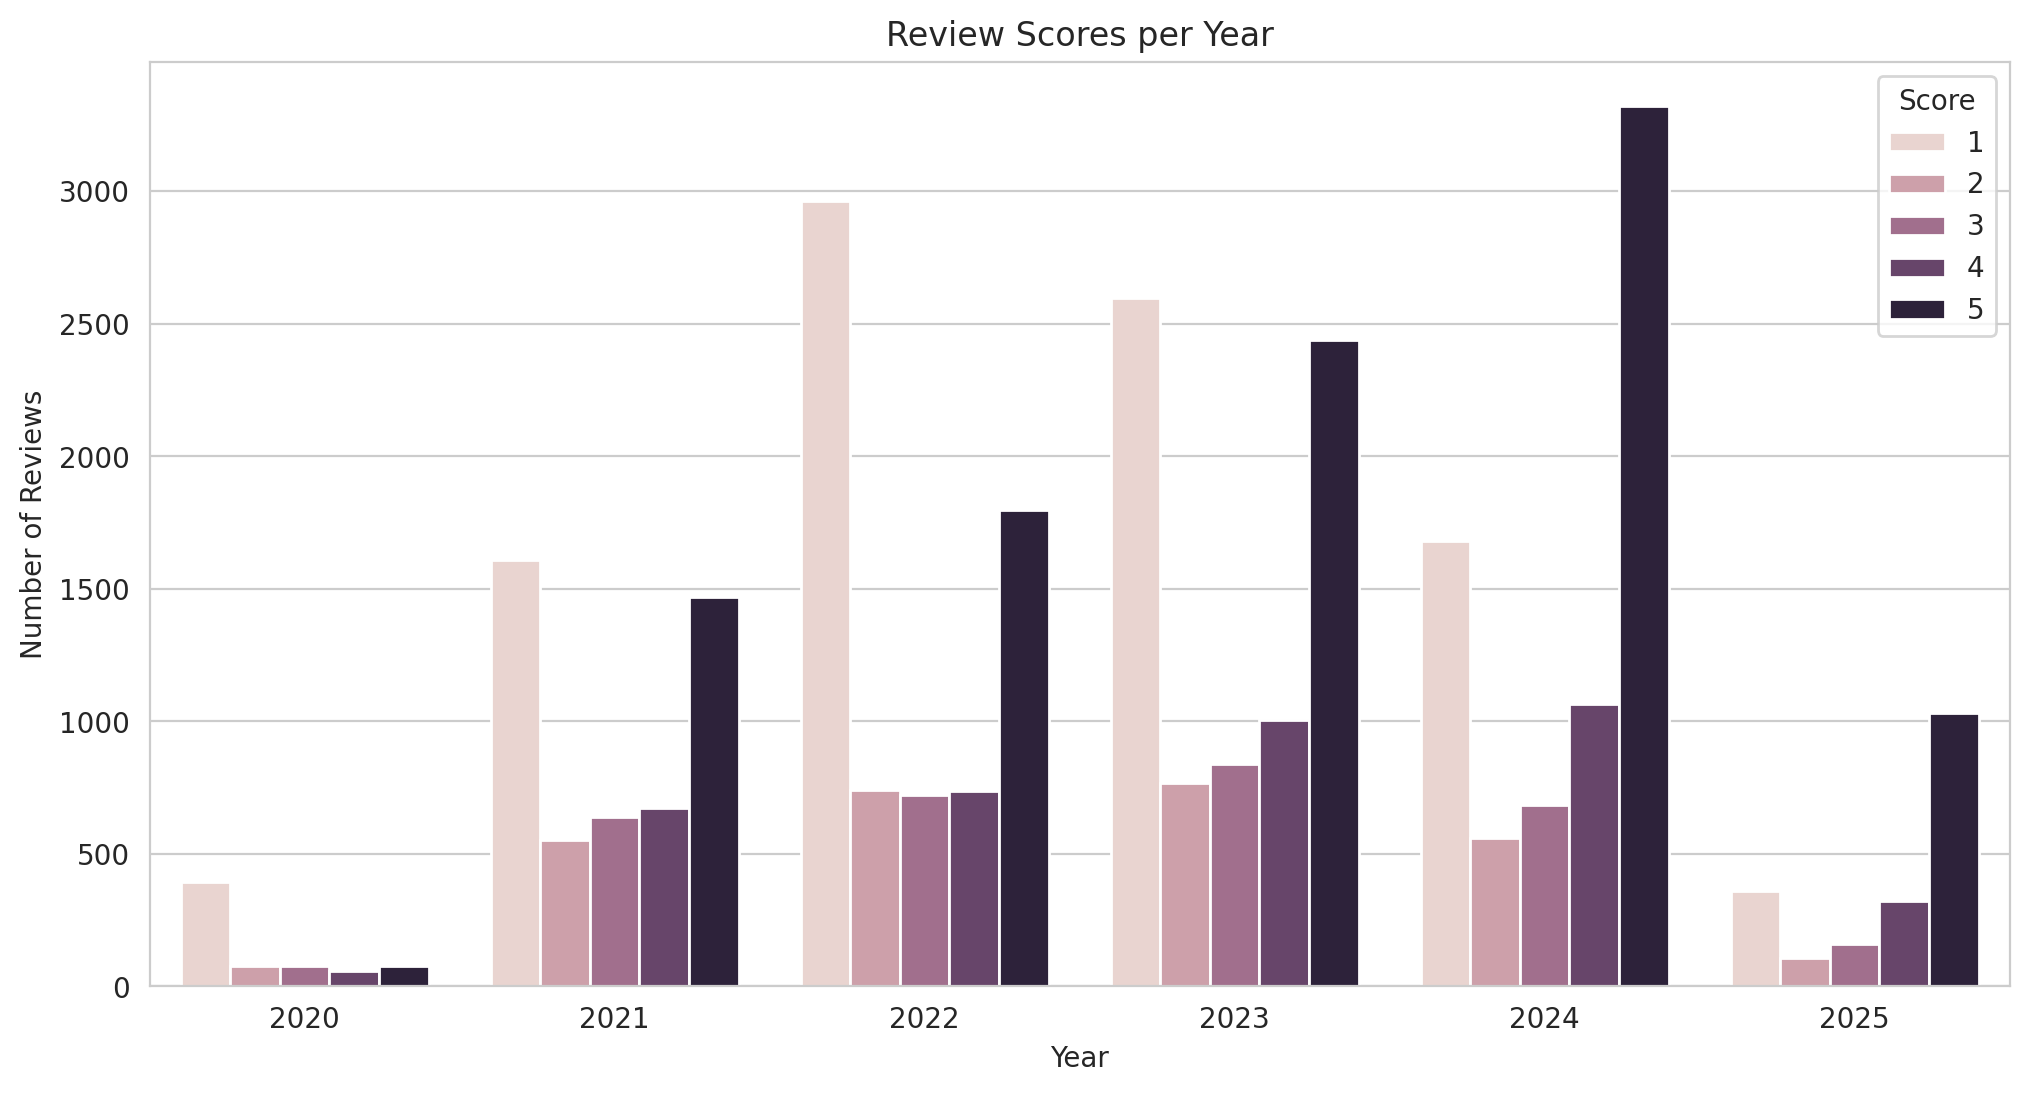

score     1    2    3     4     5
year                             
2020    393   77   79    58    77
2021   1610  554  641   673  1470
2022   2963  740  724   737  1796
2023   2596  768  838  1006  2439
2024   1680  559  685  1064  3320
2025    361  106  162   324  1030

In [55]:
# prompt: count for each score per year with bar chart

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_mifit is your DataFrame and it's already loaded
# ... (your existing code to load and process df_mifit)

# Convert 'at' column to datetime objects
df_mifit['at'] = pd.to_datetime(df_mifit['at'])

# Create a 'year' column from the 'at' column
df_mifit['year'] = df_mifit['at'].dt.year

# Group data by year and score, then count occurrences
score_per_year = df_mifit.groupby(['year', 'score'])['id'].count().reset_index()

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='id', hue='score', data=score_per_year)
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.title('Review Scores per Year')
plt.legend(title='Score')
plt.show()

# Assuming df_mifit is your DataFrame and it has 'year' and 'score' columns
score_per_year = df_mifit.groupby('year')['score'].value_counts().unstack(fill_value=0)
score_per_year

## Word Cloud

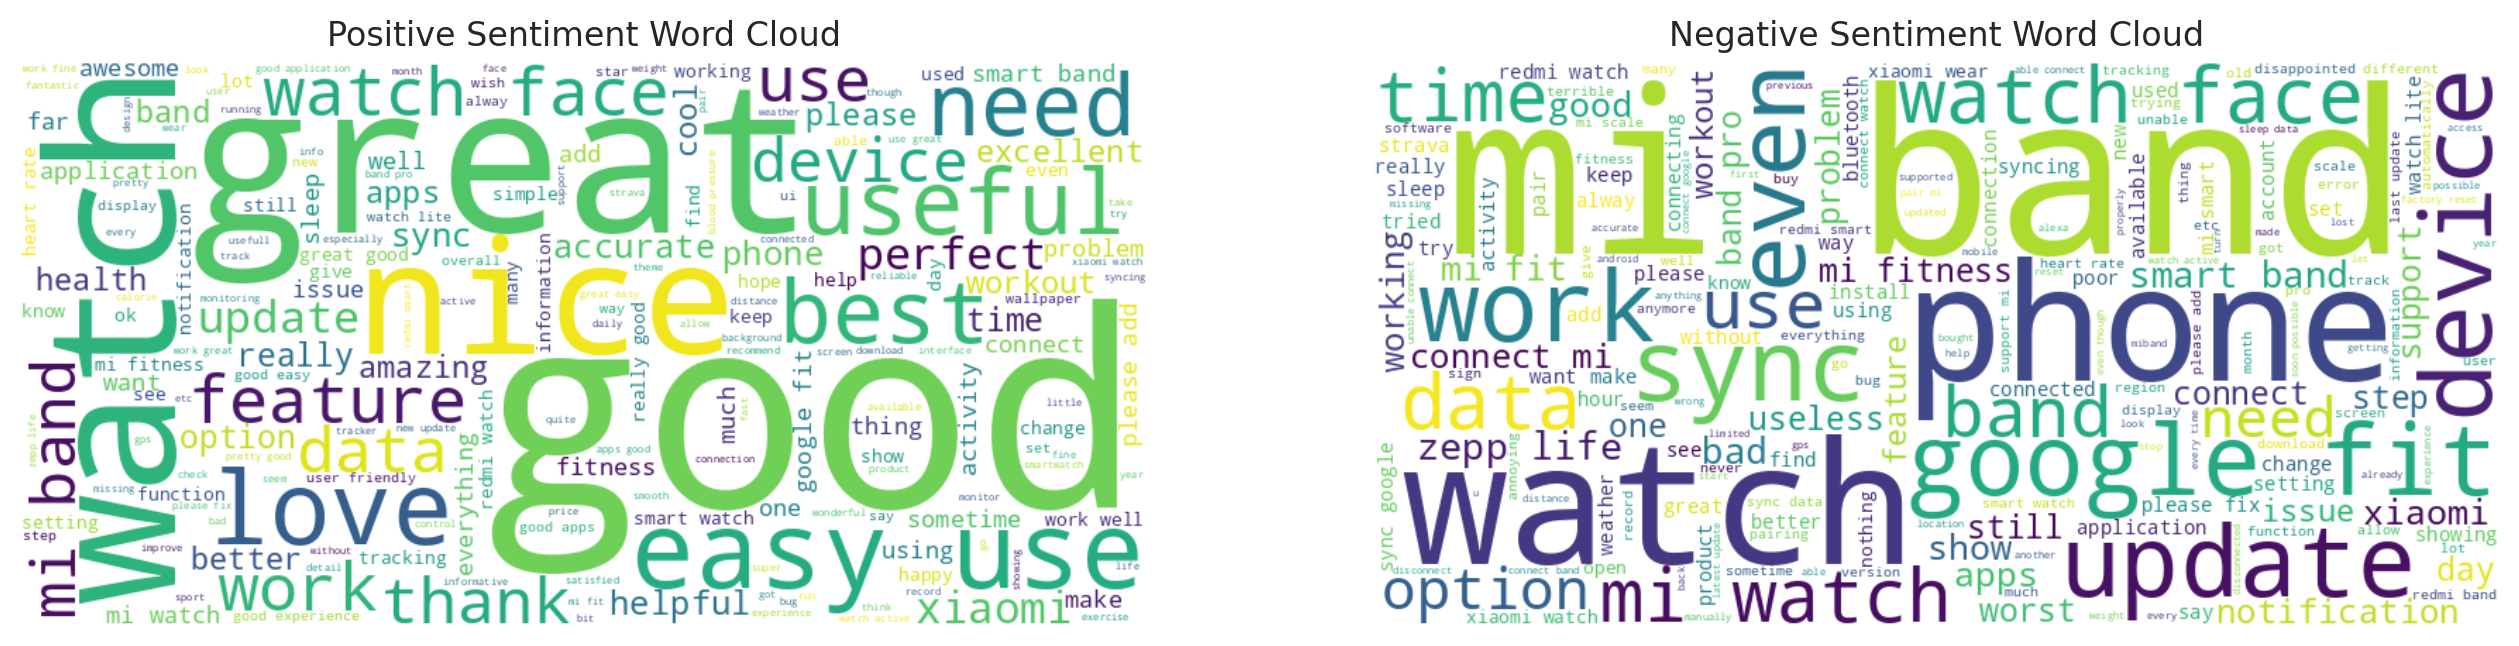

In [56]:
# prompt: make a wordcloud for negative sentiment and positive sentiment

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming df_mifit is your DataFrame and 'cleaned_content' and 'sentiment_rating' columns exist

# Separate positive and negative reviews
positive_reviews = df_mifit[df_mifit['sentiment_rating'] == 'Positive']['cleaned_content']
negative_reviews = df_mifit[df_mifit['sentiment_rating'] == 'Negative']['cleaned_content']

# Create word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_reviews))
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_reviews))

# Display the word clouds
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Sentiment Word Cloud")

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Sentiment Word Cloud")

plt.show()
